# Интернет-магазин «Стримчик». 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План проведения исследования.**
<ol>
    <li>Подключение к источнику информации (файл данных).</li>
    <li>Анализ данных.</li>
    <li>Предобработка данных. Устранение выявленных нарушений целостности данных; Восстановление отсутствующих данных; Иправление типов данных; Обогащение данных, расчётными данными и т.д.</li>
    <li>Проведение исследовательского анализа.Формирование и проверка гипотез.</li>
    <li>Формирование выводов.</li>
</ol>

## Открытие файла с данными и изучение общей информации

### Подключение библиотек

In [1]:
# Имопртируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import norm
import matplotlib.pyplot as plt
# (%matplotlib inline) Позволяет отображать в блокнотах графики Matplotlib
%matplotlib inline  

### Загрузка данных из файла в датафрейм

In [2]:
# Подключаемся к файлу данных csv и читаем его. Используем разделитель текста \t
try: 
    data = pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    data = pd.read_csv('games.csv')

### Анализируем общую информацию о полученном датафрейме

In [3]:
# Выводим на просмотр первые 5 строк, для ознакомления с данными
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()  # Методом info знакомимся с названиями столбцов, типами данных и наличием пропусков в данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Выводим данные по отсутствующим значениям в DataFrame
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# Определяем наличие полных дубликатов строк в DataFrame
dupl_count = data.duplicated().sum()
print(f'Количество полных дубликатов в DataFrame составляет: {dupl_count}')

Количество полных дубликатов в DataFrame составляет: 0


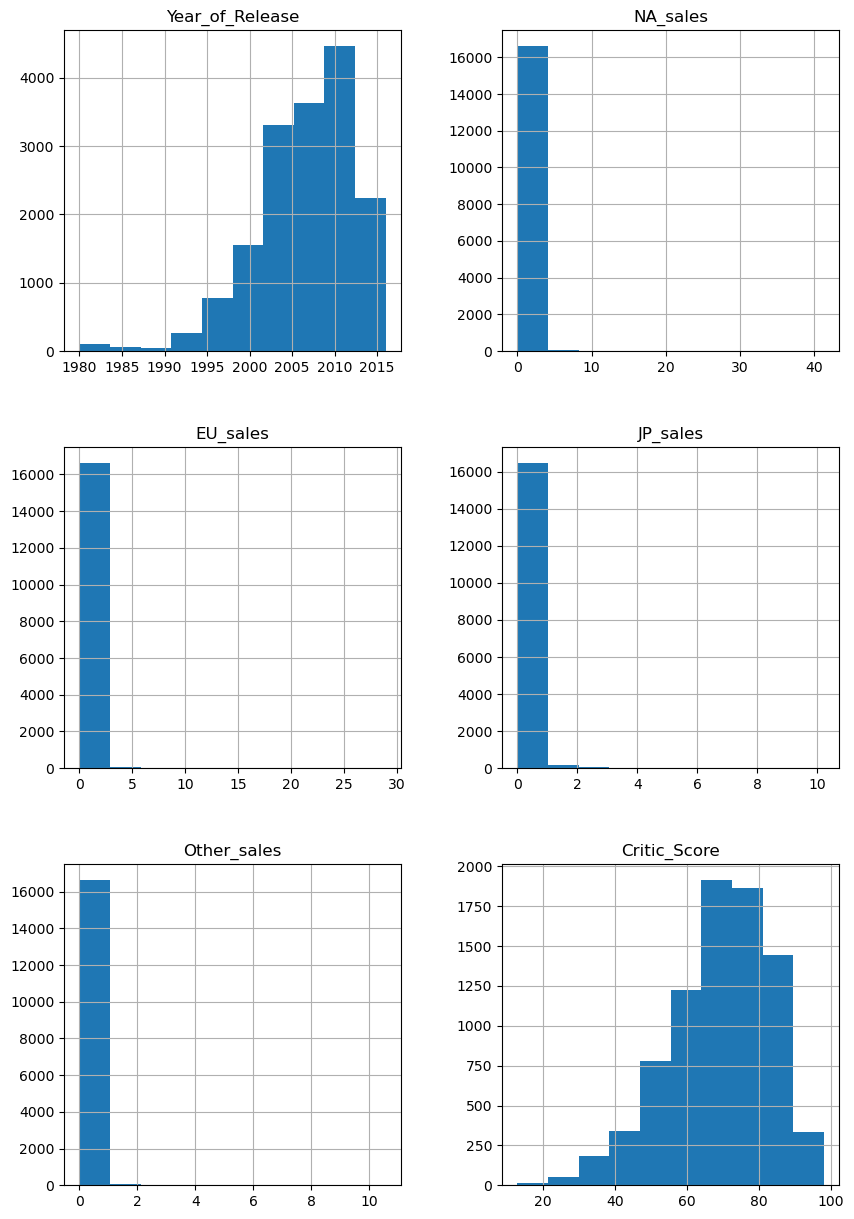

In [7]:
data.hist(figsize=(10, 15))  # Выводим гистограммы по столбцам
plt.show()

## Предобработка данных

### Изменение названия столбцов (приводим к нижнему регистру);

In [8]:
def percent_missed(count):
    '''
    Функция определяет количество пропущенных значений и подсчитывает их долю, в процентах.
    В качестве "count", требуется передать название столбца в текстовом формате 'column_name'
    '''
    total_count = data['platform'].count()  # Определяем общее количество строк в DataFrame
    ceiling_count = data[count].isna().sum() # Считаем количество пропущенных значений
    return print(f'Количество пропущенных значений составляет {ceiling_count}, что составляет {ceiling_count / total_count * 100 :.2f}% от всех данных.')

In [9]:
data.columns  # Выводим список названий столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [10]:
data.columns = data.columns.str.lower()  # Приводим название столбцов к нижнему регистру
data.columns  # Проверяем изменения названия столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [11]:
data.info()  # Выводим список столбцов и их типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
data.head()  # Выводим DataFrame для проведения анализа данных

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Следующие столбцы имеют <u>не верный</u> тип данных:**
- [x] `year_of_release` - год выпуска;
- [x] `critic_score` - оценка критиков (максимум 100);
- [x] `user_score` - оценка пользователей (максимум 10)

#### Столбец `year_of_release`

In [13]:
# Выводим уникальные значаения столбца
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Столбец `year_of_release` имеет текстовый формат, в то время, как данные в нём являются временем года, а точнее - годом.

Исходя из имеющийся информации в DataFrame, проанализируем названия игр и года их выпуска. В случае наличия игры с указание года выпуска и столбца без указания года, при совпадении названия игры пропуски в годах заполним имеющейся информацией. Т.е. при наличии данных о дате выпуска игры, формируем предположение, что эта игра выходила в этом же году и заполняем этим годом пропущенные данные.
Все оставшиеся строки с пропусками данных в этом столбце удалить, т.к. информации по которой возможно идентифицировать год выпуска игры - отсутствует.

In [14]:
# Посчитаем количество пропущенных данных в столбце year_of_release
percent_missed('year_of_release')

Количество пропущенных значений составляет 269, что составляет 1.61% от всех данных.


In [15]:
# В столбце 'year_of_release' находим отсутсвтующие значения и применяем группировку к столбцу 'name', группировку 
# производим по столбцу 'year_of_release' рассчитывая при этом медианное значение и перезаписываем новые данные 
# в столбец DataFrame
data['year_of_release'] = data['year_of_release'].fillna(data.groupby('name')['year_of_release'].transform('median'))
percent_missed('year_of_release')

Количество пропущенных значений составляет 146, что составляет 0.87% от всех данных.


In [16]:
data = data.dropna(subset=['year_of_release'])  # Производим удаление оставшихся пропущенных значений 
data['year_of_release'] = data.year_of_release.astype(int)  # Меняем тип данных на int
percent_missed('year_of_release')

Количество пропущенных значений составляет 0, что составляет 0.00% от всех данных.


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16569 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16569 non-null  object 
 2   year_of_release  16569 non-null  int32  
 3   genre            16567 non-null  object 
 4   na_sales         16569 non-null  float64
 5   eu_sales         16569 non-null  float64
 6   jp_sales         16569 non-null  float64
 7   other_sales      16569 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


#### Столбец `critic_score`

In [18]:
# Выводим уникальные значаения столбца
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

In [19]:
percent_missed('critic_score')

Количество пропущенных значений составляет 8494, что составляет 51.26% от всех данных.


#### Столбец `user_score`

In [20]:
# Выводим уникальные значаения столбца
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [21]:
percent_missed('user_score')

Количество пропущенных значений составляет 6635, что составляет 40.04% от всех данных.


### Обработайте пропуски при необходимости:

In [22]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8494
user_score         6635
rating             6701
dtype: int64

#### Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

**name and genre**

In [23]:
# Выводим данные по отсутствующим значениям столбца "name" - Название игры
data[(data['name'].isna()) & (data['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [24]:
percent_missed('name')

Количество пропущенных значений составляет 2, что составляет 0.01% от всех данных.


В столбце `name` и `genre` 2 пропущенных значения, что составляет менее 0,01% от генеральной совокупности данных.

Прежде чем принять решение об удалении этих данных, проверим гипотезу, согласно которой в 1993 году могла выпускаться одна игра. В случае справедливости гипотезы, заполним пропущенные данные названием игры. В противном случае, данные подлежат удалению.

In [25]:
count_games = data[data['year_of_release'] == 1993]['name'].count()
print(f'Количество игр выпущенных в 1993 году, составляет {count_games} штук.')

Количество игр выпущенных в 1993 году, составляет 60 штук.


In [26]:
data = data.dropna(subset=['name'])

In [27]:
percent_missed('name')

Количество пропущенных значений составляет 0, что составляет 0.00% от всех данных.


**critic_score**

Так как количество отсутствующих значений велико и удаление этих строк не целесообразно (более 51,26% данных), принимается решение двнные не удалять. По описанию данных, значение в столбце `critic_score` могут принимать значение от 0 до 100, произведём замену отсутсвтующих данных на значение -1.

In [28]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [29]:
data['critic_score'] = data['critic_score'].astype(int)  # Меняем тип данных на int

In [30]:
percent_missed('critic_score')

Количество пропущенных значений составляет 0, что составляет 0.00% от всех данных.


**user_score**

Так как количество отсутствующих значений велико и удаление этих строк не целесообразно (более 54,49% данных), принимается решение двнные не удалять. 

По описанию данных, значение в столбце `user_score` могут принимать значение от 0 до 10, произведём замену отсутствующих данных на значение -1.

In [31]:
# Выведем несколько строк для анализа строк содержащих аббревиатуру "tbd" 
data.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-1,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-1,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,-1,tbd,E


In [32]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [33]:
# Производим замену отсутствующих значений
data['user_score'] = data['user_score'].fillna(-1)

In [34]:
# Производим замену типа данных на float
data['user_score'] = data['user_score'].astype(float)

In [35]:
percent_missed('user_score')

Количество пропущенных значений составляет 0, что составляет 0.00% от всех данных.


**rating**

In [36]:
# Проверяем данные содержащиеся в столбце "rating"
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [37]:
percent_missed('rating')

Количество пропущенных значений составляет 6699, что составляет 40.44% от всех данных.


Так как количество отсутствующих значений велико и удаление этих строк не целесообразно (более 40,44% данных), принимается решение двнные не удалять. 

Значение в столбце `rating` категоризованы, на этом основании замена отсутсвтующих значений на "-1" не приемлема, произведём замену отсутсвующих значений на "unknown".

In [38]:
# Производим замену отсутствующих значений на значение "unknown"
data['rating'] = data['rating'].fillna('unknown')

In [39]:
percent_missed('rating')

Количество пропущенных значений составляет 0, что составляет 0.00% от всех данных.


In [40]:
# Проверяем пропуски после работы с отсутсвтующими значениями
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Опишите причины, которые могли привести к пропускам;

#### Обратите внимание на аббревиатуру `'tbd'` в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [41]:
# Подсчитаем количество строк, которые имеют аббревиатуру "tbd"
tbd = data.query('user_score == "tbd"')['user_score'].count()
print(f'Количество строк которые содержат аббревиатуру "tbd" составляет: {tbd} шт.')

Количество строк которые содержат аббревиатуру "tbd" составляет: 0 шт.


Большинство значений столбца относятся к типу данных `float`. В столбце имеется аномальное значение `tbd`

Согласно информации из сети интернет [`TBD`](https://yandex.ru/search/?text=tbd+%D1%80%D0%B0%D1%81%D1%88%D0%B8%D1%84%D1%80%D0%BE%D0%B2%D0%BA%D0%B0+%D0%B0%D0%B1%D0%B1%D1%80%D0%B5%D0%B2%D0%B8%D0%B0%D1%82%D1%83%D1%80%D1%8B&lr=213&redircnt=1678814559.1) - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. 

Исходя из вышеприведённой информации, произведём замену аббревиатуры `tbd` на `Nan`

In [42]:
percent_missed('user_score')

Количество пропущенных значений составляет 0, что составляет 0.00% от всех данных.


#### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец `sale_amount`.

In [43]:
data['sale_amount'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale_amount
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


## Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

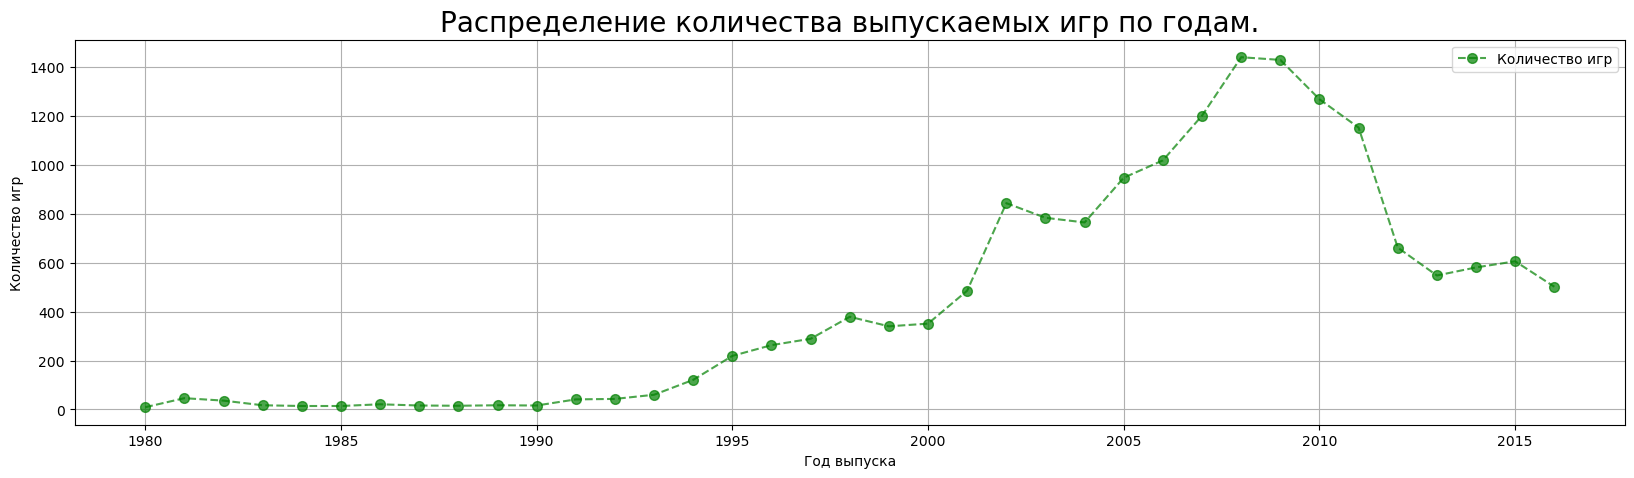

In [44]:
# Формируем гистограмму по количеству выпущенных игр по года
plt.figure(figsize=(20, 5))  # Задаём размер гистограммы
plt.plot(data.groupby('year_of_release')['name'].count(), # группируем данные
         color='green', linestyle='--', marker='o', markersize=7, label='Количество игр', alpha=0.7)  # Настройки гистограммы
plt.grid(True)  # Отображаем сетку
plt.title('Распределение количества выпускаемых игр по годам.', fontsize=20)  # Отображаем название таблицы
plt.ylabel('Количество игр')  # Отображаем название оси y
plt.xlabel('Год выпуска')  # Отображаем название оси x
plt.legend()  # Отображаем на гистограмме названия (легенду)
plt.show()

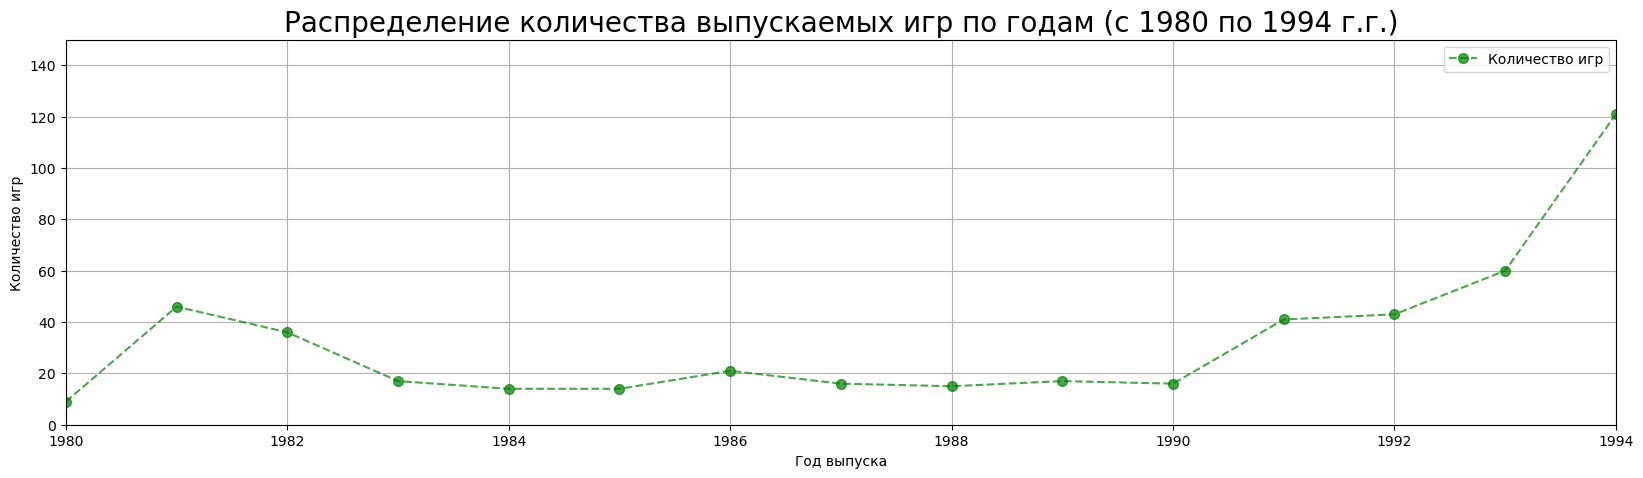

In [45]:
# Формируем гистограмму по количеству выпущенных игр по года
plt.figure(figsize=(20, 5))  # Задаём размер гистограммы
plt.plot(data.groupby('year_of_release')['name'].count(), # группируем данные
         color='green', linestyle='--', marker='o', markersize=7, label='Количество игр', alpha=0.7)  # Настройки гистограммы
plt.grid(True)  # Отображаем сетку
plt.title('Распределение количества выпускаемых игр по годам (с 1980 по 1994 г.г.)', fontsize=20)  # Отображаем название таблицы
plt.ylabel('Количество игр')  # Отображаем название оси y
plt.xlabel('Год выпуска')  # Отображаем название оси x
plt.legend()  # Отображаем на гистограмме названия (легенду)
plt.xlim(1980, 1994)  # Детализируем интересующую область по оси "x"
plt.ylim(0, 150)  # Детализируем интересующую область по оси "y"
plt.show()

In [46]:
#  Выводим количество игр выпущенных в 2008 году
max_count_game = data.query('year_of_release == 2008')['name'].count()
print(f'В 2008 году было выпущено {max_count_game} новая игра, что является максимальным количеством за анализируемый период.')

В 2008 году было выпущено 1441 новая игра, что является максимальным количеством за анализируемый период.


На анализируемом графике до 1990 года, количество выпускаемых игр примерно одинаково, не считая роста 1981 года. Начиная с 1991 года происходит рост выпуска игр вплоть до 2008 года. В 2008 году было выпущено 1441 новая игра, что является максимальным количеством за анализируемый период. 

После 2009 года происходит резкое сокращение выпуска новых игр. В результате анализа сети интернет, можно с уверенностью говорить о том, что 2008 год был насыщен на знаковые собития ([10 памятных событий](https://snob.ru/selected/entry/1366/), [РиаНовости](https://ria.ru/20081226/158117155.html)) основным собитие которое могло повлиять на различные отрасли по всему миру является начало мирового финансового кризиса, который начался в 2008 году, а своего пика достиг в 2009.

Логичным будет предположить, что одним из следствием начала мирового финансового кризиса, стало резкое снижение выпуска игр.

### Посмотрите, как менялись продажи по платформам.

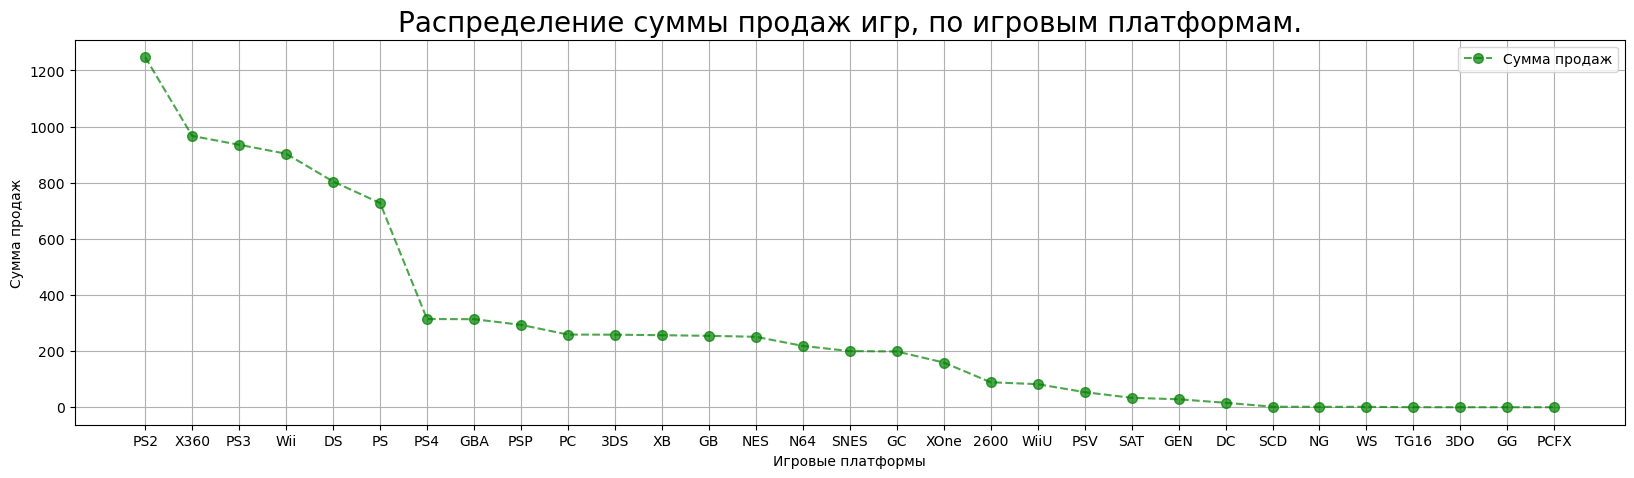

In [47]:
# Формируем гистограмму по количеству выпущенных игр по года
plt.figure(figsize=(20, 5))  # Задаём размер гистограммы
plt.plot(data
         .groupby('platform')['sale_amount']
         .sum()
         .sort_values(ascending=False), # группируем данные
         color='green', linestyle='--', marker='o', markersize=7, label='Сумма продаж', alpha=0.7)  # Настройки гистограммы
plt.grid(True)  # Отображаем сетку
plt.title('Распределение суммы продаж игр, по игровым платформам.', fontsize=20)  # Отображаем название таблицы
plt.ylabel('Сумма продаж')  # Отображаем название оси y
plt.xlabel('Игровые платформы')  # Отображаем название оси x
plt.legend()  # Отображаем на гистограмме названия (легенду)
plt.show()

#### Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 

Для дальнейшего анализа будут использованы первые 6 (`PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`) игровых платфор, как имеющие наибольшие суммарные продажи.

In [48]:
top_platforms = data.groupby(['platform'])['sale_amount'].sum().sort_values(ascending=False).head(6).reset_index()['platform']

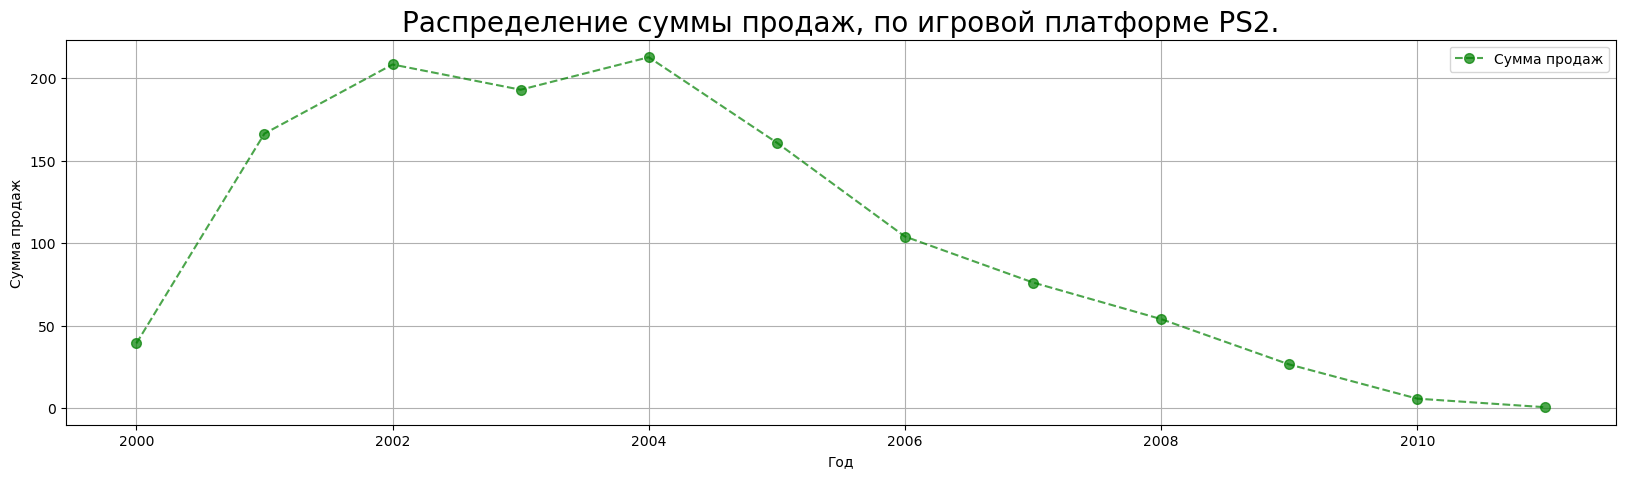

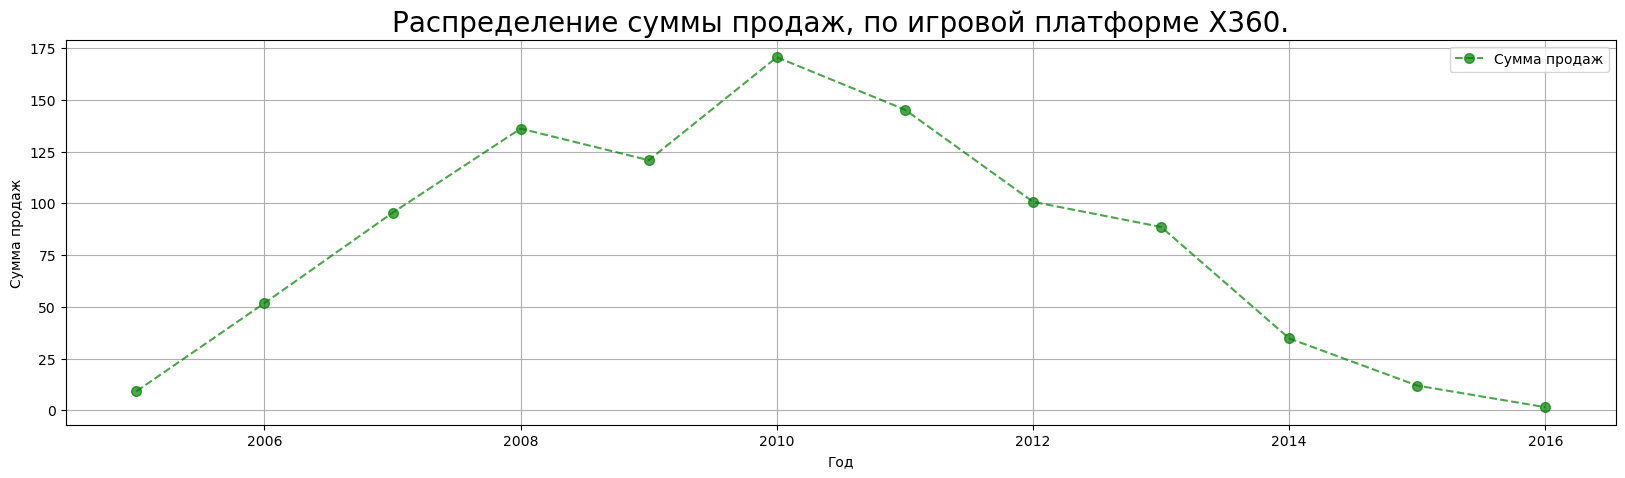

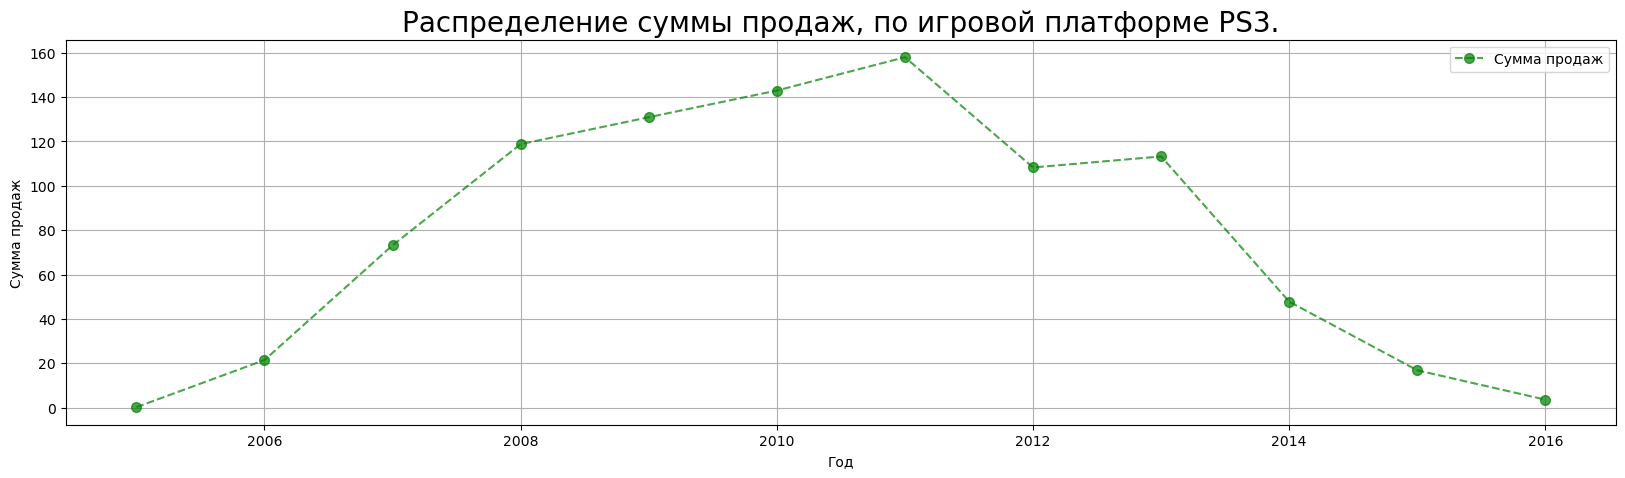

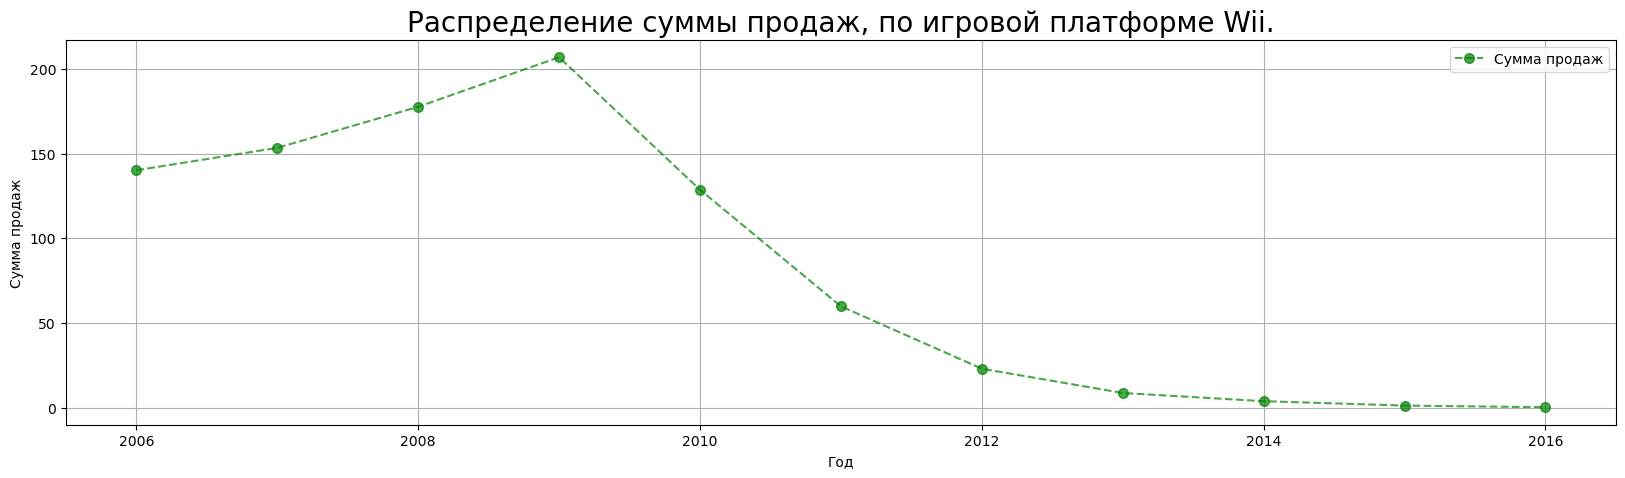

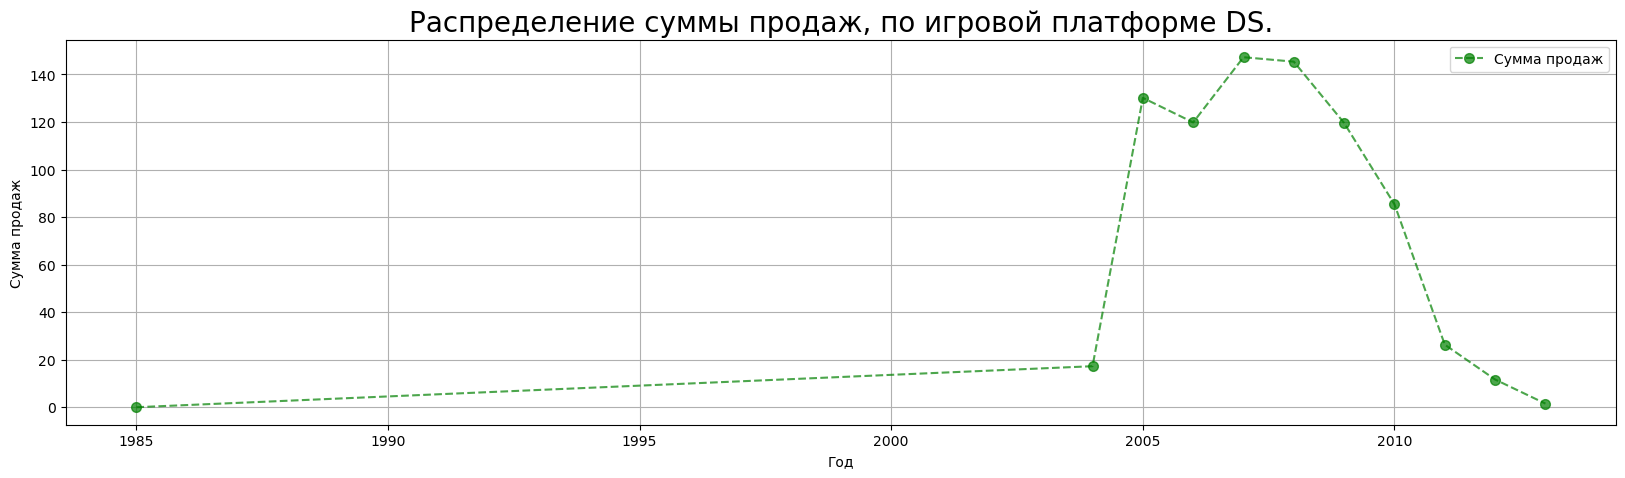

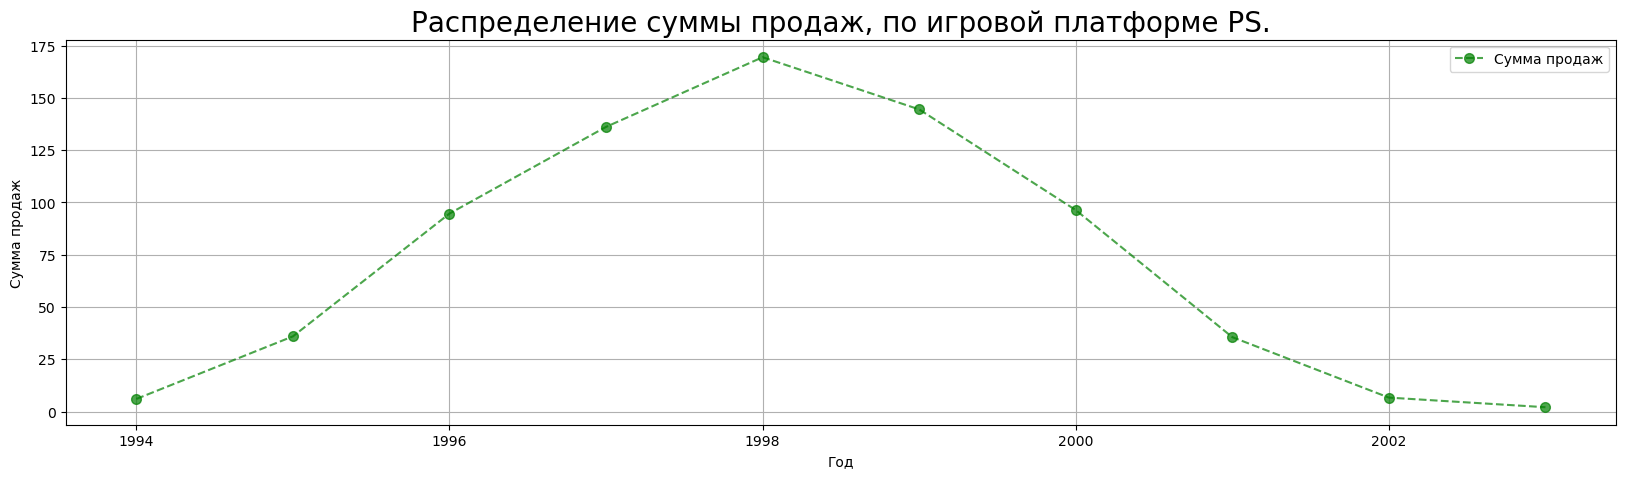

In [49]:
for platform in top_platforms:
    plt.figure(figsize=(20, 5))  # Задаём размер гистограммы
    plt.plot(data
             .query('platform == @platform')  # Выбираем платформу
             .pivot_table(index=['year_of_release'], values='sale_amount', aggfunc='sum')  # Сводная таблица
             , color='green', linestyle='--', marker='o', markersize=7, label='Сумма продаж', alpha=0.7)  # Настройки гистограммы
    plt.grid(True)  # Отображаем сетку
    plt.title(f'Распределение суммы продаж, по игровой платформе {platform}.', fontsize=20)  # Отображаем название таблицы
    plt.ylabel('Сумма продаж')  # Отображаем название оси y
    plt.xlabel('Год')  # Отображаем название оси x
    plt.legend()  # Отображаем на гистограмме названия (легенду)
    plt.show()

#### За какой характерный срок появляются новые и исчезают старые платформы?

In [50]:
life_span_of_game = []
for platform in top_platforms:
    number_years = data.query('platform == @platform').pivot_table(
        index=['year_of_release'], 
        values='sale_amount', 
        aggfunc='sum').count().iloc[0]  # Сводная таблица
    life_span_of_game.append(int(number_years))
total_life = int(sum(life_span_of_game)/len(life_span_of_game))
print(f'Средний срок за который появляются и исчезают игры, составляет в среднем {total_life} лет.')

Средний срок за который появляются и исчезают игры, составляет в среднем 11 лет.


### Возьмите данные за соответствующий `актуальный период`. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

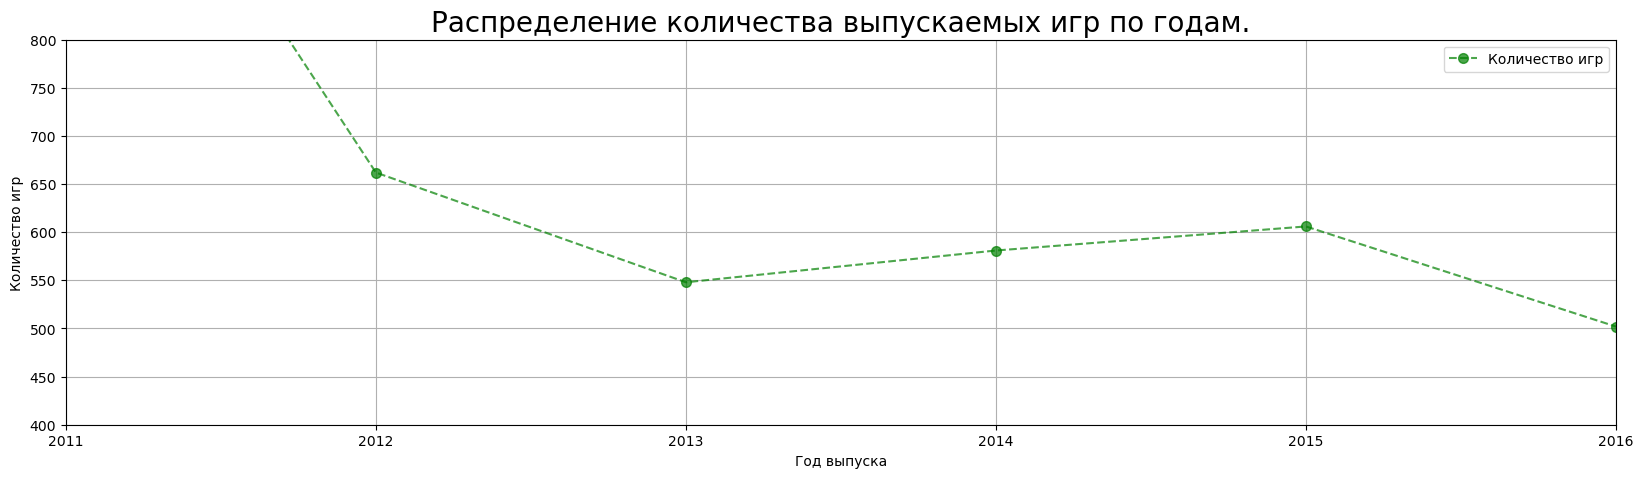

In [51]:
# Формируем гистограмму по количеству выпущенных игр по года
plt.figure(figsize=(20, 5))  # Задаём размер гистограммы
plt.plot(data.groupby('year_of_release')['name'].count(), # группируем данные
         color='green', linestyle='--', marker='o', markersize=7, label='Количество игр', alpha=0.7)  # Настройки гистограммы
plt.grid(True)  # Отображаем сетку
plt.title('Распределение количества выпускаемых игр по годам.', fontsize=20)  # Отображаем название таблицы
plt.ylabel('Количество игр')  # Отображаем название оси y
plt.xlabel('Год выпуска')  # Отображаем название оси x
plt.legend()  # Отображаем на гистограмме названия (легенду)
plt.xlim(2011, 2016)  # Детализируем интересующую область по оси "x"
plt.ylim(400, 800)  # Детализируем интересующую область по оси "y"
plt.show()

На основании графика распределения количества выпускаемых игр по годам, приходим к выводу что до 2012 года прозошло максимальное снижение количества выпуска игр. После 2012 года снижение продолжилось но уже меньшей интенсивностью, а после 2013 года произошёл рост выпуска игр.

Таким образом наиболее актуальным переиодом для прогнозирования на 2017 год, являются данные после 2012 года, их будем испольщзовать для дальнейшего анализа.

### Не учитывайте в работе данные за `предыдущие годы`.

In [52]:
# Определяем количество платформ, которые остались на рынке после 2012 года
all_platfom = len(data['platform'].unique())
remaining_platform = len(data.query('year_of_release >= 2012')['platform'].unique())
print(f'После 2012 года от {all_platfom} игровой платформы, зафиксированный и используемых в аналите, \
осталось только {remaining_platform} платформ, которые будут использоваться для дальнейшего анализа.')

После 2012 года от 31 игровой платформы, зафиксированный и используемых в аналите, осталось только 11 платформ, которые будут использоваться для дальнейшего анализа.


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [53]:
# Формируем сводную таблицу продаж по годам в разрезе игровых платформ
sales_table_platform = data.query('year_of_release >= 2012') \
                            .pivot_table(index='platform', columns='year_of_release', values='sale_amount', aggfunc='sum')
sales_table_platform

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.76,56.57,43.76,27.78,15.14
DS,11.67,1.54,NaN,NaN,NaN
PC,23.45,13.01,13.28,8.52,5.25
PS3,108.28,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.95,3.38,0.24,0.12,NaN
PSV,16.19,10.59,11.90,6.25,4.25
Wii,22.94,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


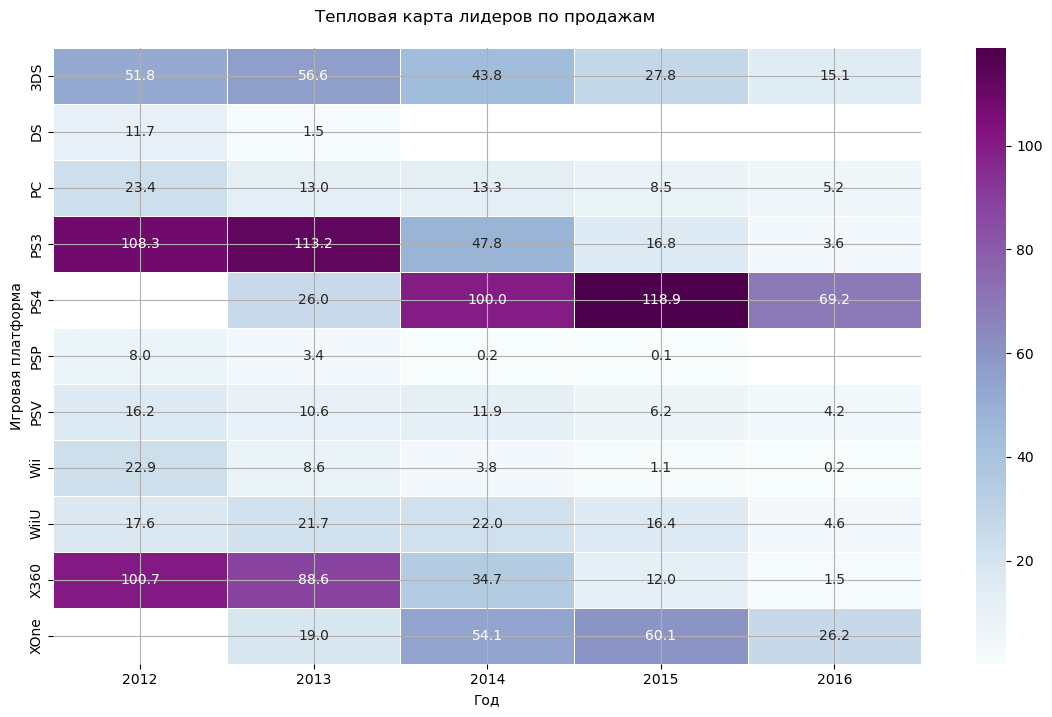

In [54]:
plt.figure(figsize=(14, 8))  # Задаём размер тепловой карты
sns.heatmap(sales_table_platform, # Данные сводной таблицы
            annot=True, # Отображение цифровых значений
            fmt=".1f",   # Округляем значения
            linewidth=.5, # Задём расстояние между ячейками
            cmap="BuPu")  # Задаём цветовую схему (crest, YlGnBu, Blues, BuPu, Greens)
plt.title('Тепловая карта лидеров по продажам \n')
plt.ylabel('Игровая платформа')
plt.xlabel('Год')
plt.grid(True)
plt.show()

Следующие игровые платформы `PS4` и `XOne` **показывают рост** по продажам за исключением 2016 года, т.к. данные за этот год могут быть не полными.

**Остальные игровые платформы показывают снижение продаж**. Стоит отметить что игровые платформы `DS`, `PSP` уже **прекратили выпуск игр**, а Wii на грани прекращения выпуска игр. 


Для дальнейшего исследования отберём потенциально прибыльные платформы, которые на протяжении анализируемого периода показывали продажи выше среднего, это `3DS`, `PS3`, `PS4`, `X360` и `XOne`

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

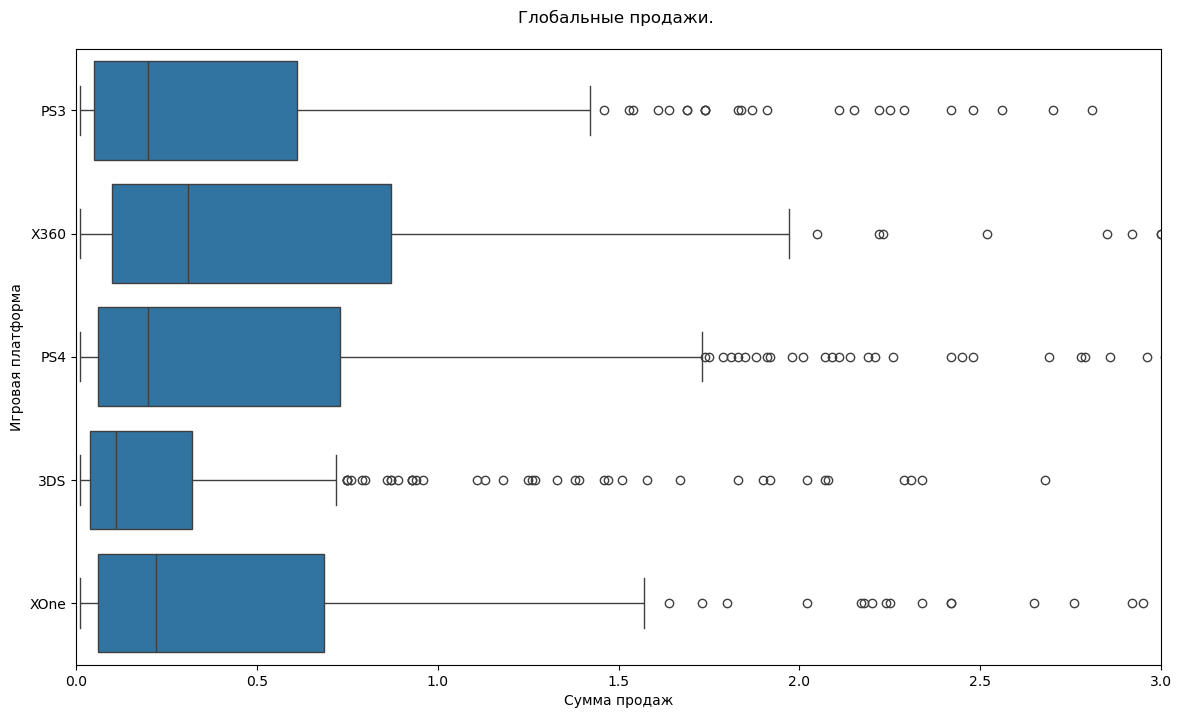

In [55]:
potential_platforms = ['3DS', 'PS3', 'PS4', 'X360', 'XOne']  # Игровые платформы для анализа

# Производим выборку данных и создаём новый DatFrame
data_platform = data.query('year_of_release >= 2012 and @potential_platforms in platform')

plt.figure(figsize=(14, 8))  # Задаём размер гистограммы
plt.xlim(0, 3)  # Задаём ограничения по оси "x"
plt.title('Глобальные продажи. \n')
ax = sns.boxplot(data=data_platform, y='platform', x='sale_amount', dodge=False, width=0.8)
ax.set_xlabel("Сумма продаж",fontsize=10)
ax.set_ylabel("Игровая платформа",fontsize=10)
ax.tick_params(labelsize=10)
plt.show()

На графике "Глобальных продаж" можно выделить 4-ре игровые платформы, игры которых имеют максимальные продажи, это `X360`, `PS4`, `XOne` и `PS3`.

Медианное значение у игровой платформы `X360` находиться выше оставльных, а граница Q1 и Q3 имеют больший диапазон, что означает что количество продаж которые приходятся на межквартильный интервал выше чем у остальных платформ, соответственно и выручка от продаж больше.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [56]:
# Формируем новый DataFrame с данными соответствующие условиям
data_x360 = data_platform.query('platform == "X360" and user_score != -1 and critic_score != -1 and user_score != 0')

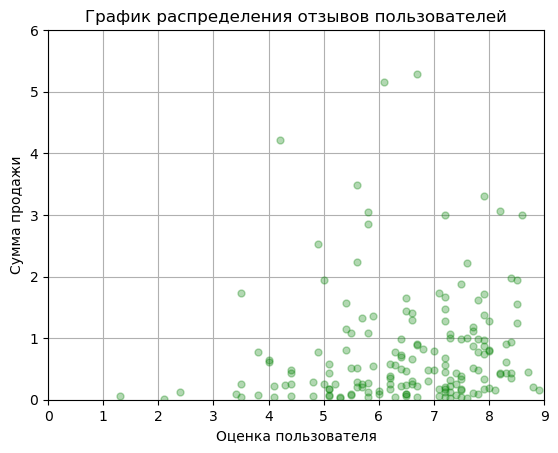

In [57]:
# Чем ниже значение alpha, тем прозрачнее каждая точка данных
# Уменьшение размеров маркеров markersize=1
plt.plot(data_x360.user_score, data_x360.sale_amount, 'o', alpha=0.3, markersize=5, c='g')

# Увеличим масштаб области, где находится большинство точек данных.
# Функции xlim и ylim устанавливают нижнюю и верхнюю границы для осей x и y; 
plt.ylim(0, 6)
plt.xlim(0, 9)

plt.rcParams["figure.figsize"] = (15,5)  # Размер графика
plt.xlabel('Оценка пользователя')
plt.ylabel('Сумма продажи')
plt.title('График распределения отзывов пользователей')
plt.grid(True)
plt.show()

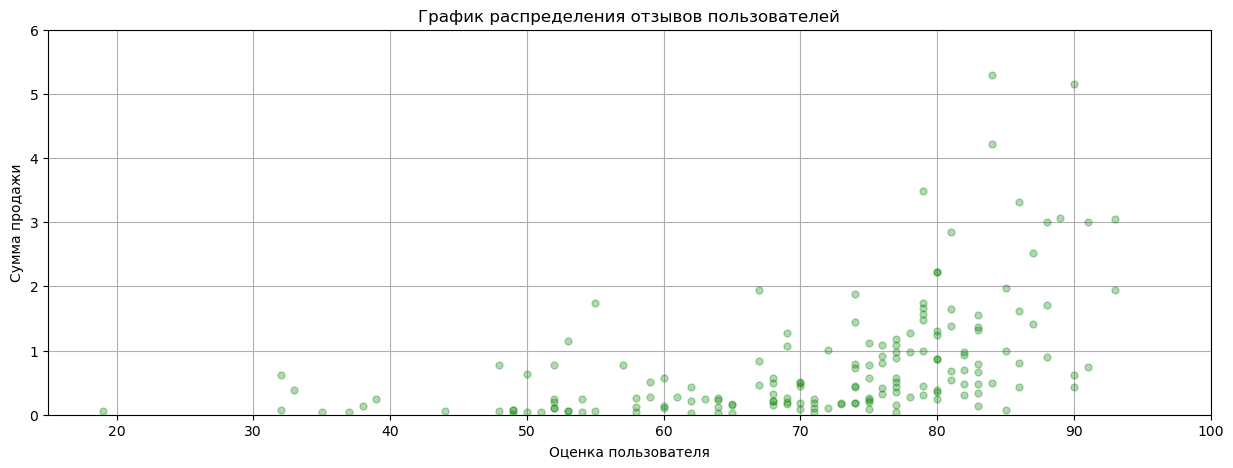

In [58]:
# Чем ниже значение alpha, тем прозрачнее каждая точка данных
# Уменьшение размеров маркеров markersize=1
plt.plot(data_x360.critic_score, data_x360.sale_amount, 'o', alpha=0.3, markersize=5, c='g')

# Увеличим масштаб области, где находится большинство точек данных.
# Функции xlim и ylim устанавливают нижнюю и верхнюю границы для осей x и y; 
plt.ylim(0, 6)
plt.xlim(15, 100)

plt.rcParams["figure.figsize"] = (15,5)  # Размер графика
plt.xlabel('Оценка пользователя')
plt.ylabel('Сумма продажи')
plt.title('График распределения отзывов пользователей')
plt.grid(True)
plt.show()

In [59]:
user_corr = data_x360.sale_amount.corr(data_x360.user_score)
critic_corr = data_x360.sale_amount.corr(data_x360.critic_score)
print(f'Коэффициент корреляции для отзывов пользователей составляет {user_corr:.4f}')
print(f'Коэффициент корреляции для отзывов критиков составляет {critic_corr:.4f}')

Коэффициент корреляции для отзывов пользователей составляет -0.0023
Коэффициент корреляции для отзывов критиков составляет 0.3603


Для отзывов критиков имеет корреляция являются положительной, при этом значение 0,36 говорит о том, что не смотря на `положительную направленность корреляции`, **взаимосвязь незначительна**.

Для отзывов пользователей составляет -0,0023 т.е. значение близко к нулю, значит, **линейная связь слабая либо отсутствует вовсе**.

### Соотнесите выводы с продажами игр на других платформах.

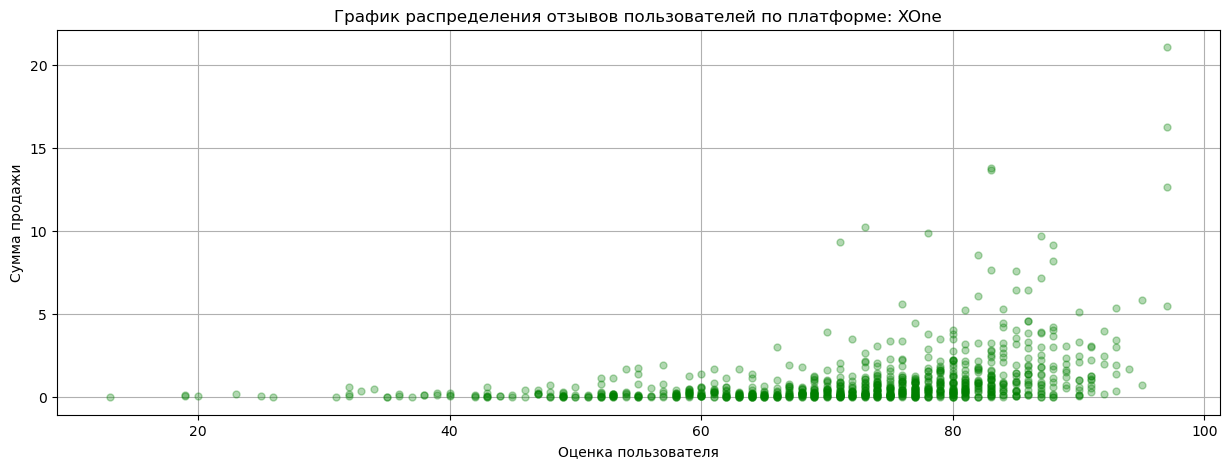

In [60]:
for platform in potential_platforms:
    df = data_platform.query('platform == @platform and user_score != -1 and critic_score != -1 and user_score != 0')
    # Чем ниже значение alpha, тем прозрачнее каждая точка данных
    # Уменьшение размеров маркеров markersize=1
    plt.plot(df.critic_score, df.sale_amount, 'o', alpha=0.3, markersize=5, c='g')
    plt.rcParams["figure.figsize"] = (15,5)  # Размер графика
    plt.xlabel('Оценка пользователя')
    plt.ylabel('Сумма продажи')
    plt.title(f'График распределения отзывов пользователей по платформе: {platform}')
plt.grid(True)
plt.show()

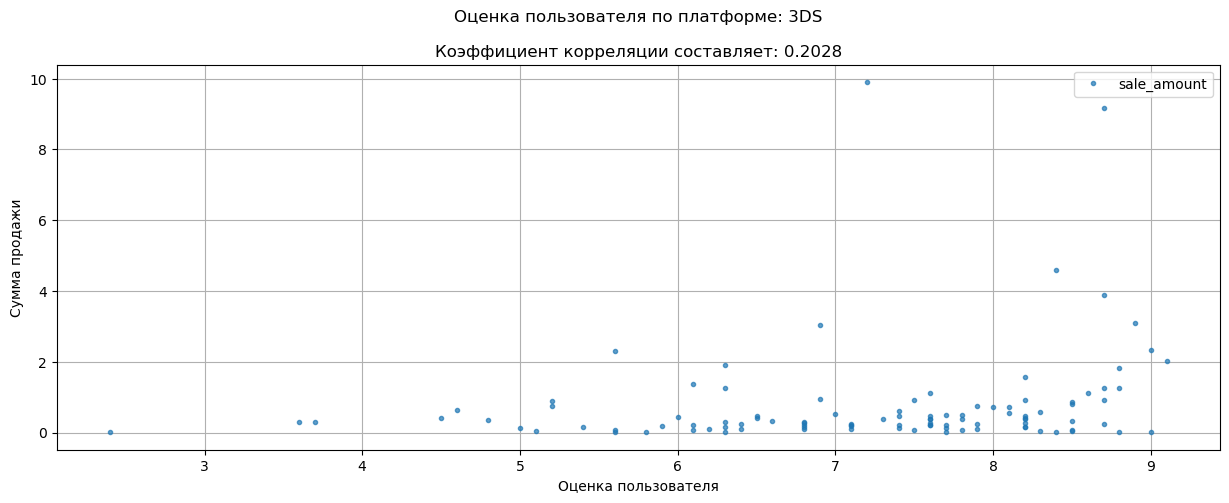

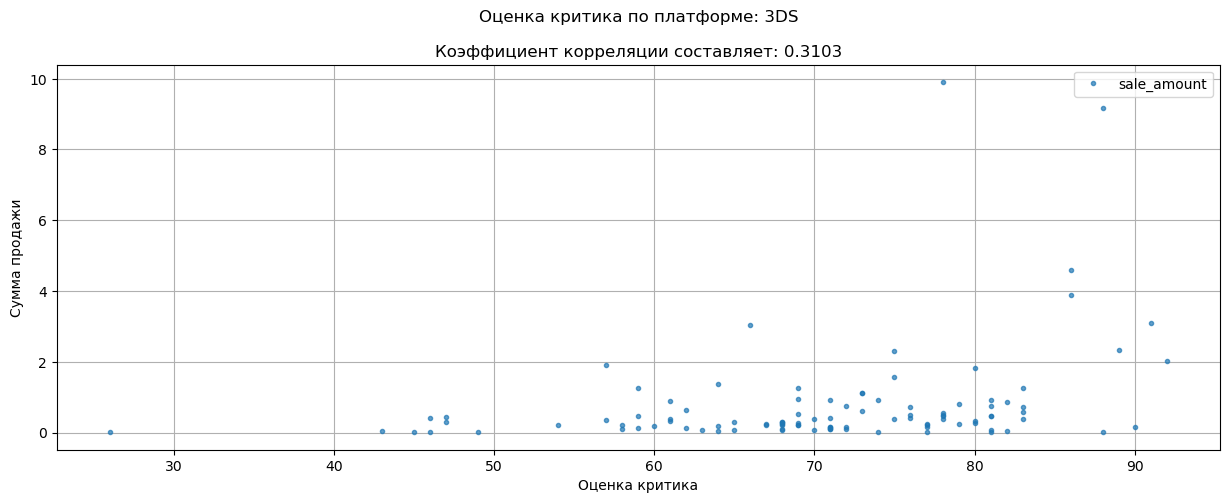

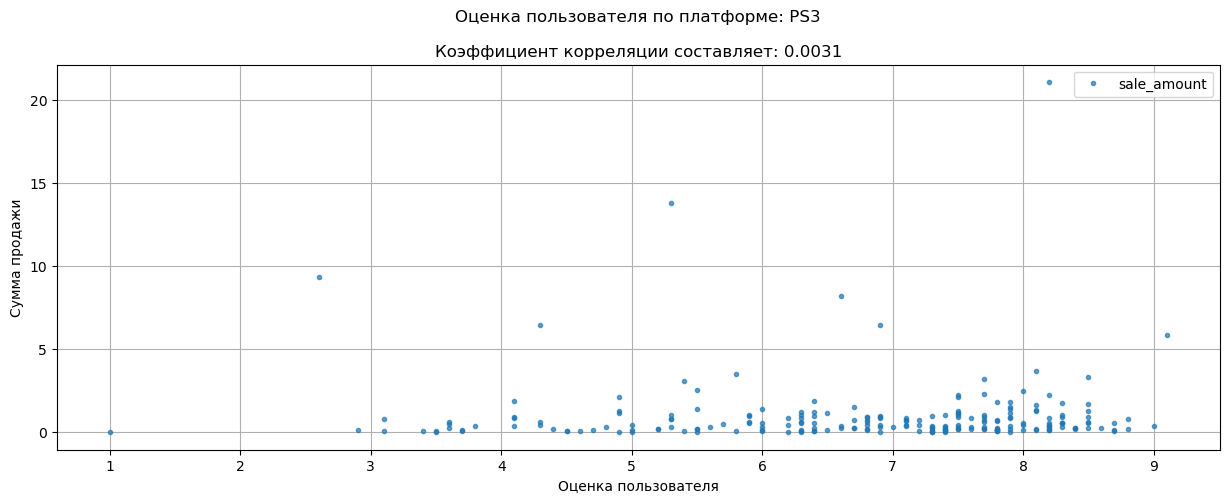

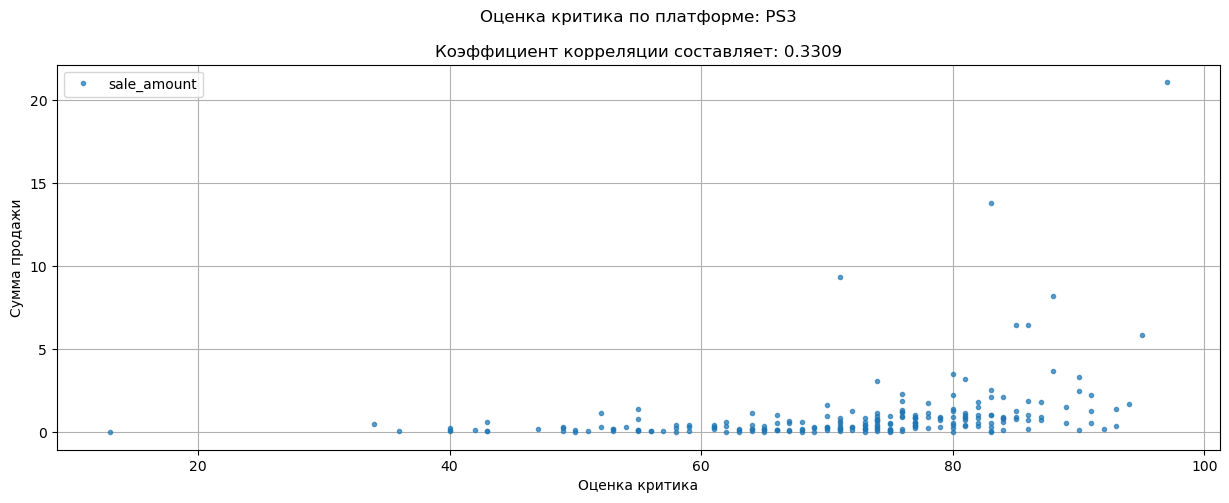

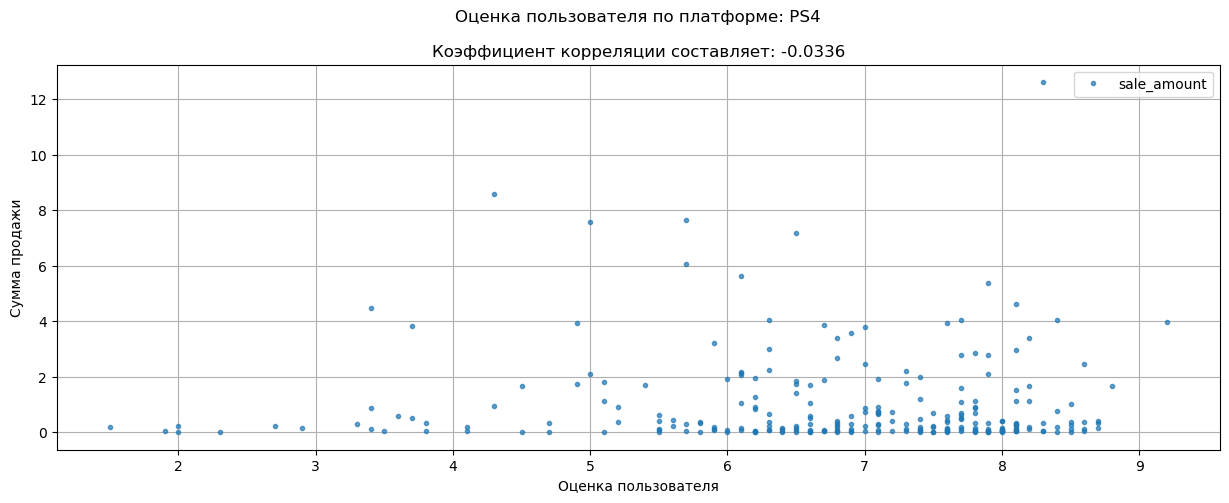

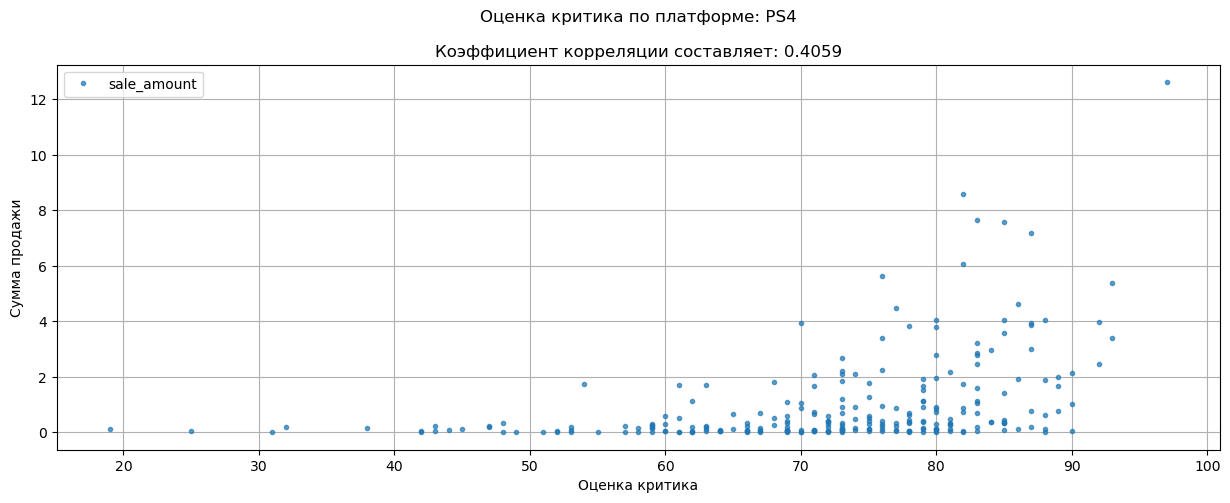

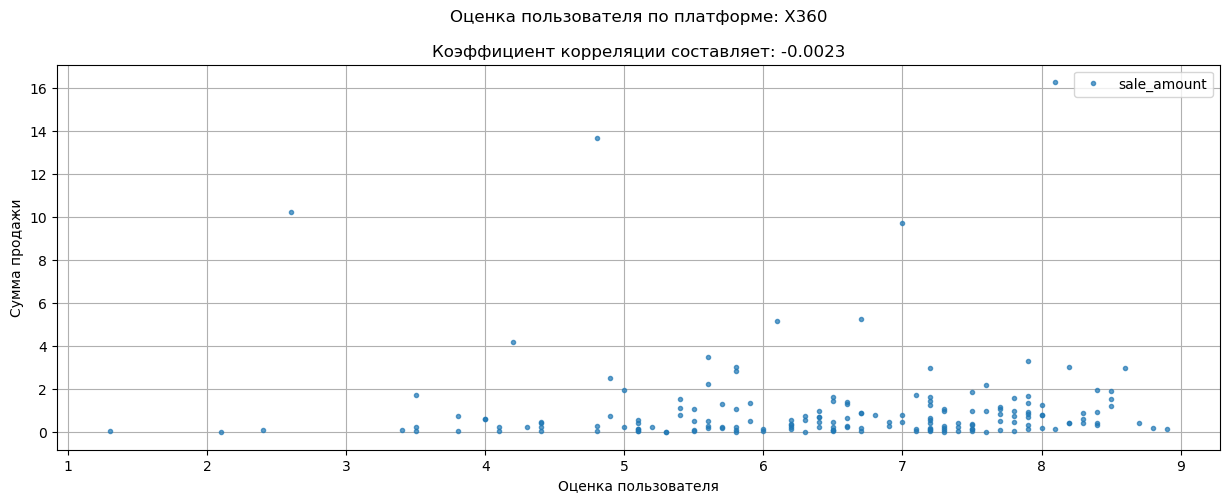

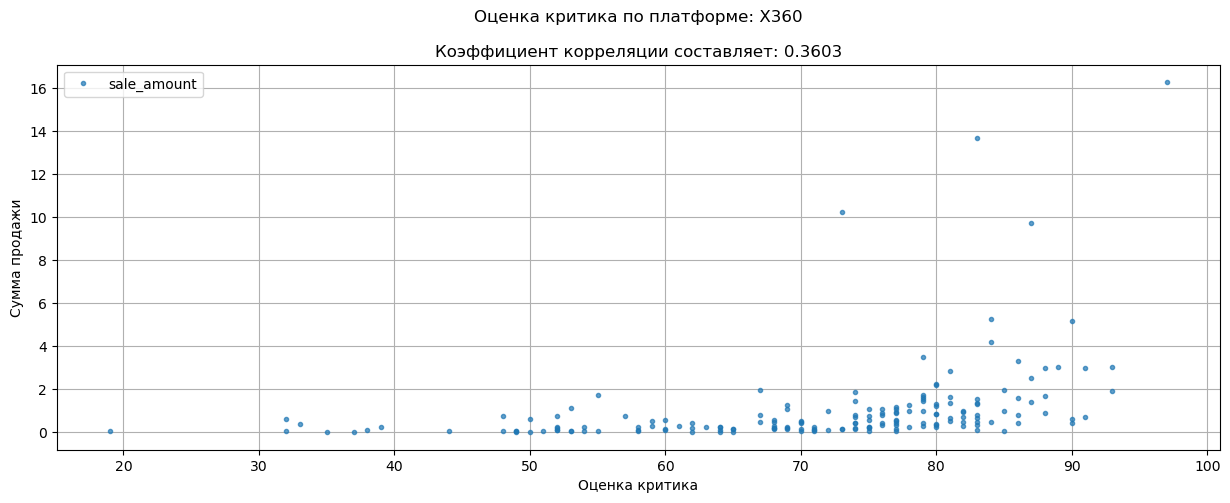

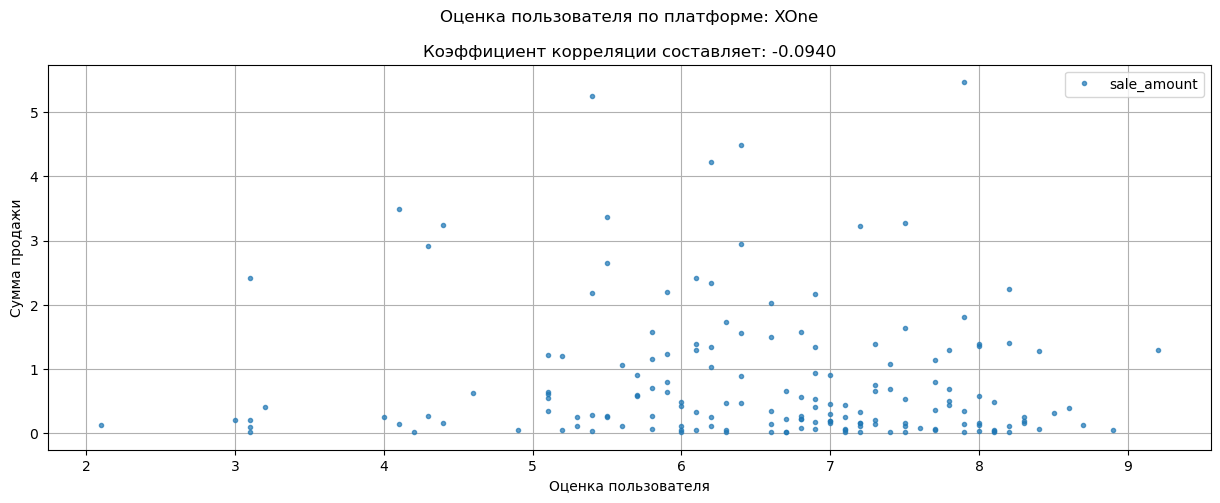

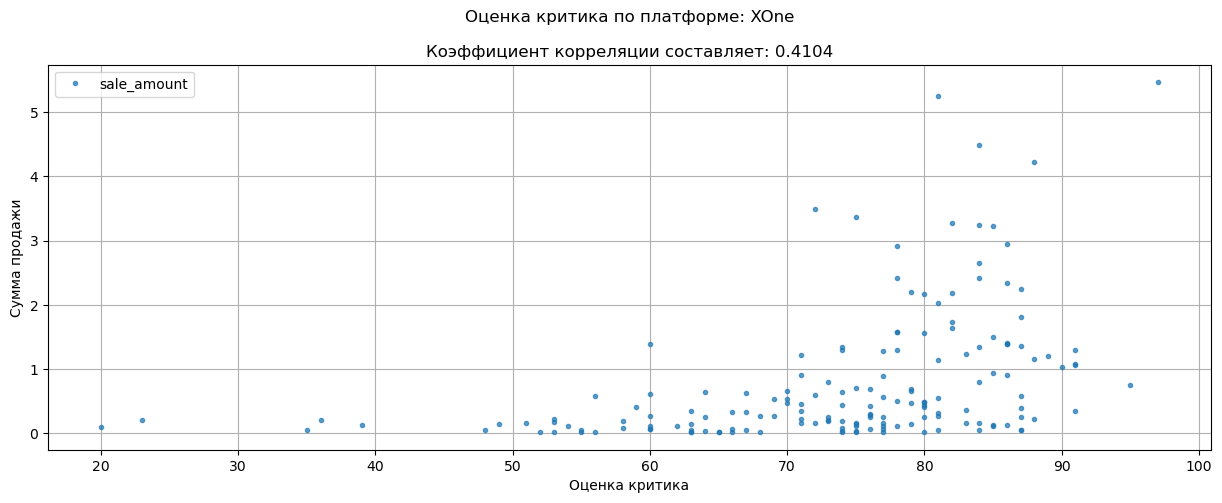

In [61]:
# Формируем список корреляций
total_corr = []

# Построим график рассеяния, для кол-ва дней размещения объявления и дате публикации
scores = {'user_score': 'Оценка пользователя', 'critic_score': 'Оценка критика'}
for platform in potential_platforms:
    y = []  # Список для корреляции 
    y.append(platform)  # В список добавляем название платформы
    
    
    for key, value in scores.items():
        df = data_platform.query('platform == @platform and user_score != -1 and critic_score != -1 and user_score != 0')
        score_corr = df.sale_amount.corr(df[key])
        ax = df.plot(x=key, y='sale_amount', style='.', \
                       title=(f'{value} по платформе: {platform}\n\nКоэффициент корреляции составляет: {score_corr:.4f}'), \
                     alpha=0.7, grid=True, sharex=False, figsize=(15, 5))
        ax.set_xlabel(f'{value}')
        ax.set_ylabel('Сумма продажи')
        plt.show()
        
        
        y.append(round(score_corr, 4))  # В список "y" добавляем данные о корреляции
    total_corr.append(y)  # Собранную информацию добавляем в список "total_corr"

In [62]:
# Создаём из списка DataFrame  с информацией о корреляции в разрезе игровых платформ
df2 = pd.DataFrame(total_corr)
df2.columns = ['Платформа', 'Корреляция по Оценке пользователя', 'Корреляция по Оценка критика']
df2

,Платформа,Корреляция по Оценке пользователя,Корреляция по Оценка критика
0,3DS,0.2028,0.3103
1,PS3,0.0031,0.3309
2,PS4,-0.0336,0.4059
3,X360,-0.0023,0.3603
4,XOne,-0.0940,0.4104


Влияние отзывов критиков на продажи имеется по всем игровым платформам и говорит о том, что не смотря на положительную направленность корреляции, взаимосвязь/влияние незначительно.

Влияние отзывов пользователей на продажи в основной своей массе отсутствует, при этом отдельно выделяется игровая платформа 3DS, показатель корреляции которой составляет 0,2028, что так же не смотря на положительную направленность корреляции, незначительная взаимосвязь/влияние имеется.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [63]:
# Формируем переменную и передаём в неё сводную таблицу 
df_genre = data_platform \
        .pivot_table(index='genre', values=['sale_amount'], aggfunc='median') \
        .sort_values(by='sale_amount', ascending=False).reset_index()
df_genre

,genre,sale_amount
0,Shooter,0.570
1,Sports,0.390
2,Racing,0.225
3,Platform,0.210
4,Role-Playing,0.200
5,Fighting,0.180
6,Action,0.170
7,Misc,0.150
8,Simulation,0.130
9,Strategy,0.085


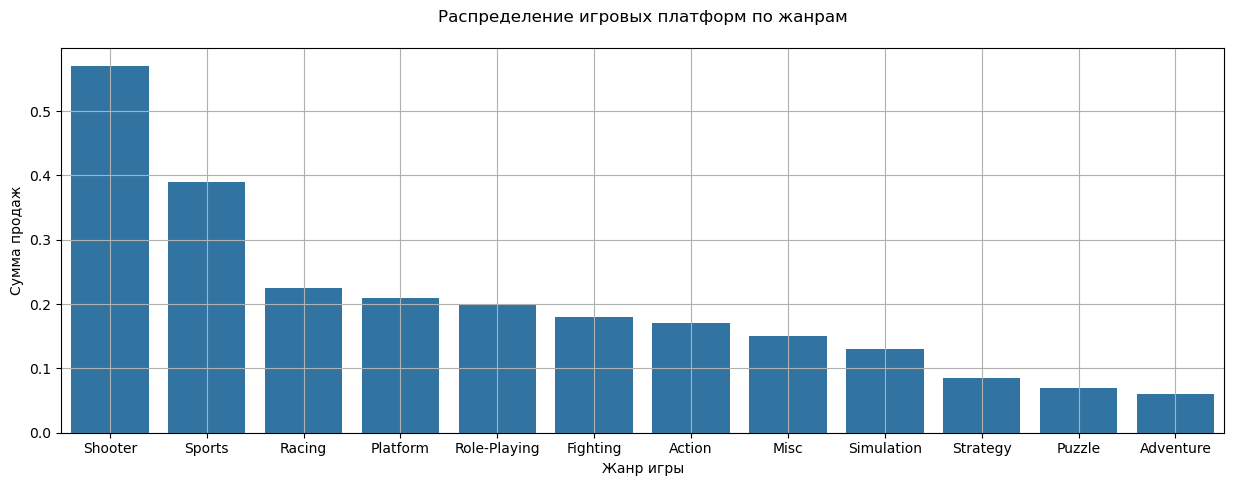

In [64]:
# Формируем гистограмму
plt.figure(figsize=(15, 5))
sns.barplot(data=df_genre, x='genre', y='sale_amount')
plt.title('Распределение игровых платформ по жанрам\n')
plt.ylabel('Сумма продаж')
plt.xlabel('Жанр игры')
plt.grid(True)
plt.show()

Наибольшее число продаж у игр жанра `Shooter` и он является самым популярным игровым жанром. Меньше всего продаж у игр в жанре `Adventure`.

Если сравнить по количеству продаж, то с большим отрывом от остальных жанров лидерами продаж являются игры в жанрах `Shooter` и `Sports`. В первую 5-ку лидеров продаж составляют такие жанры как `Shooter`, `Sports`, `Racing`, `Platform` и `Role-Playing`.

## Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):

### Самые популярные платформы (топ-5).

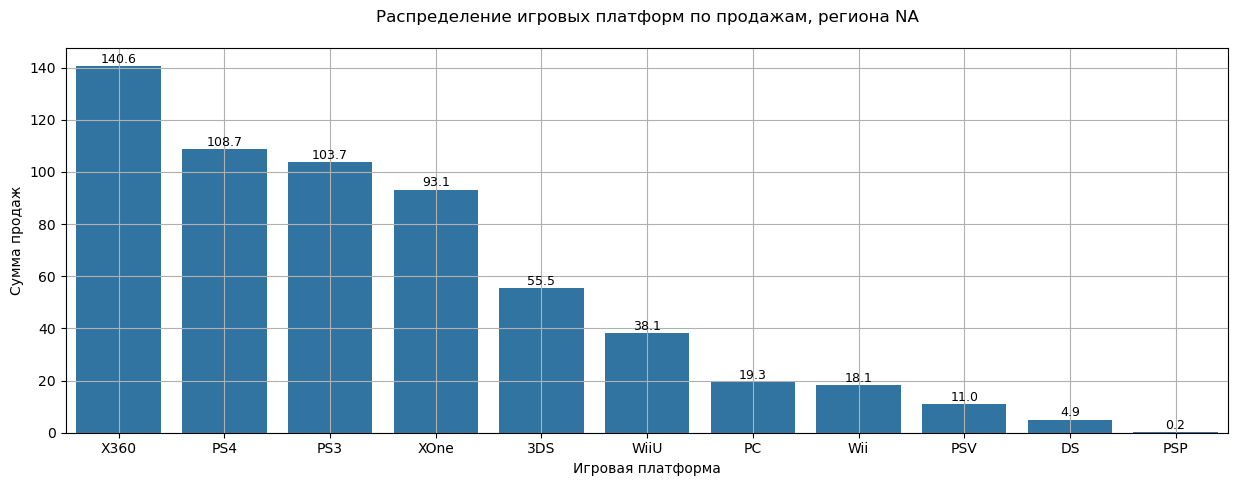

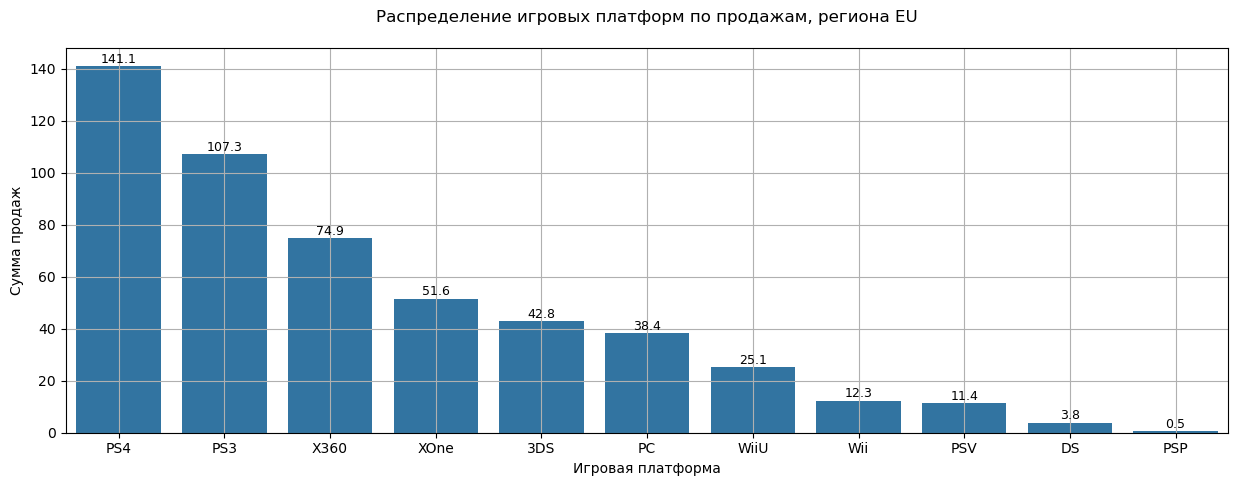

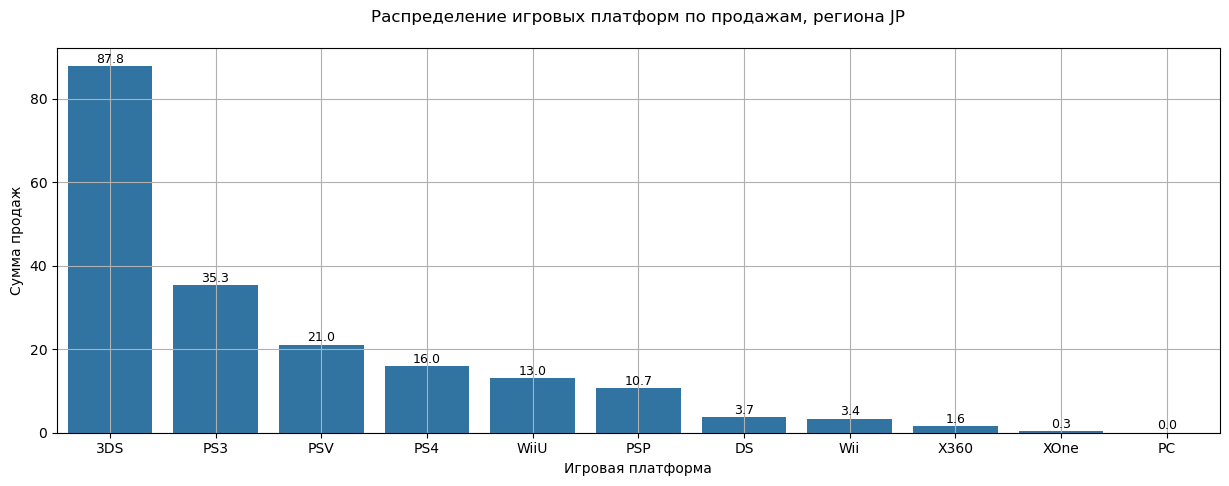

In [65]:
name_column_sales = {'na_sales': 'NA', 'eu_sales': 'EU', 'jp_sales': 'JP'}
for column_sale, region in name_column_sales.items():
    df_prepared = data.query('year_of_release >= 2012').pivot_table(index=['platform'], values=column_sale, aggfunc='sum').sort_values(by=column_sale, ascending=False).reset_index()
    # Формируем гистограмму
    plt.figure(figsize=(15, 5))
    splot = sns.barplot(data=df_prepared, x='platform', y=column_sale)
    
    # Добавляем аннотацию к столбцам диаграммы
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), # Рассчитываем местоположение стобца
                   ha = 'center', va = 'center', 
                   size=9,  # Размер текста
                   xytext = (0, 5), # Местоположение текста и его отступ от столбца
                   textcoords = 'offset points')
    
    plt.title(f'Распределение игровых платформ по продажам, региона {region}\n')
    plt.ylabel('Сумма продаж')
    plt.xlabel('Игровая платформа')
    plt.grid(True)
    plt.show()

Добавляем аннотацию к столбчатой диаграмме [источник](https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/) [Matplotlib](https://matplotlib.org/stable/tutorials/text/annotations.html)

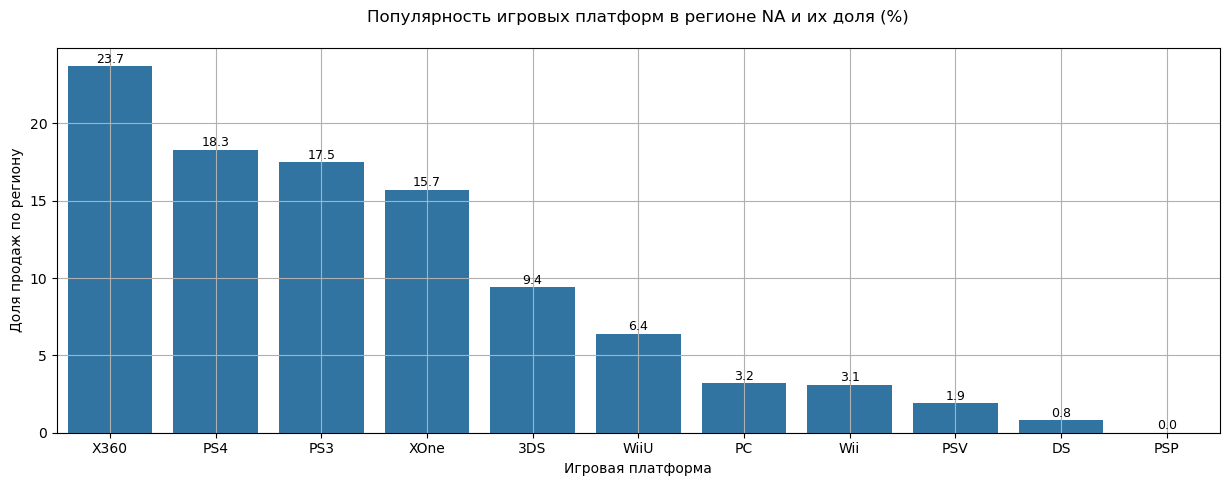

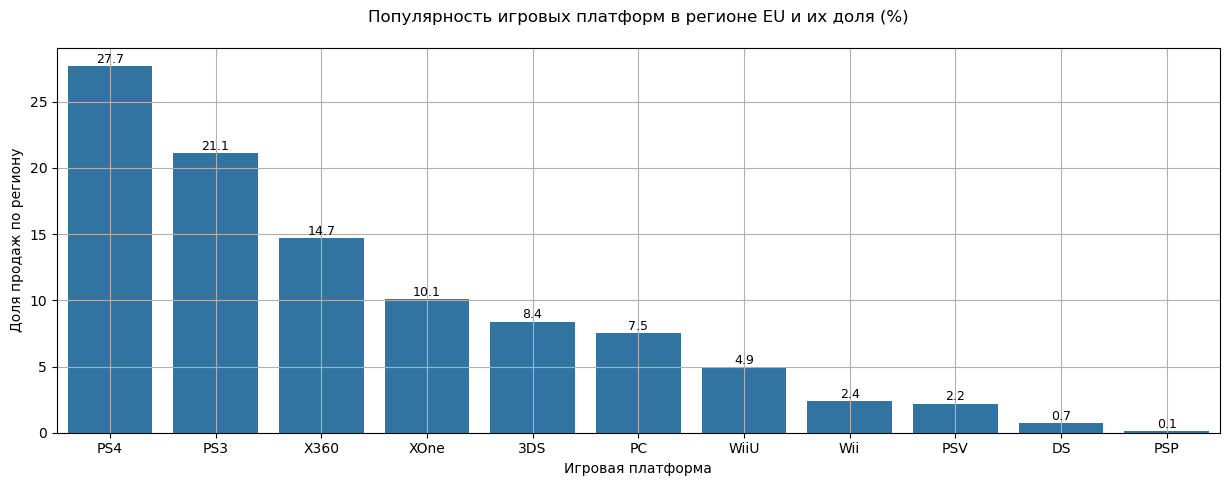

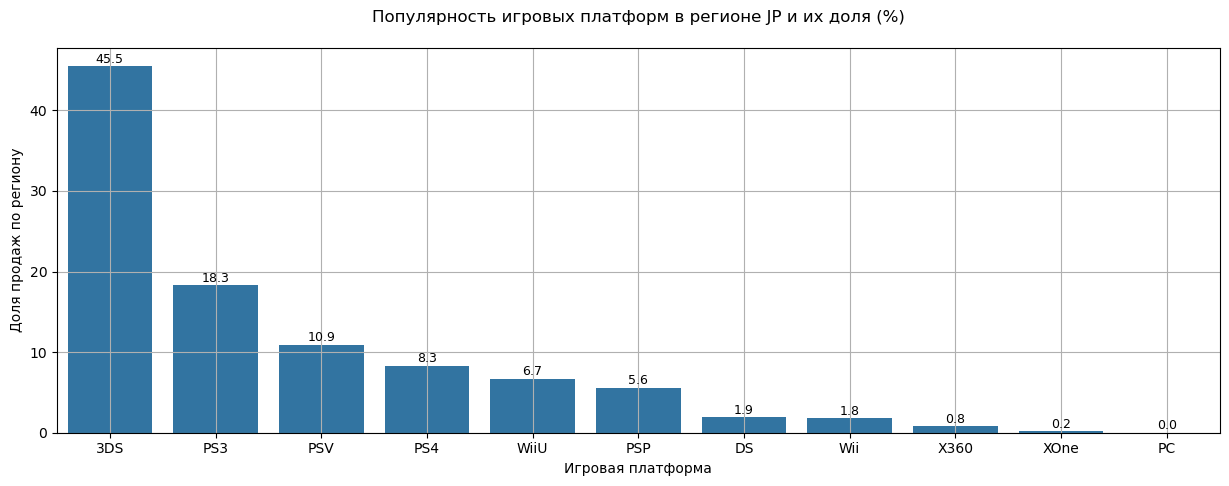

In [66]:
# Справочник районов
name_column_sales = {'na_sales': 'NA', 'eu_sales': 'EU', 'jp_sales': 'JP'}

# Создаём цикл в котором перебираем справочник "name_column_sales"
for column_sale, region in name_column_sales.items():
    df = data.query('year_of_release >= 2012').groupby(['platform'], as_index=False).aggregate({column_sale:'sum'})
    # Получаем сумму по продаж по региону
    df['total_sale'] = df[column_sale].sum()
    df['percent'] = round(df[column_sale] / df["total_sale"] * 100, 1)
        # Формируем гистограмму
    plt.figure(figsize=(15, 5))
    splot = sns.barplot(data=df.sort_values(by='percent', ascending=False), x='platform', y='percent')
    
    # Добавляем аннотацию к столбцов к диаграмме
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), # Рассчитываем местоположение стобца
                   ha = 'center', va = 'center', 
                   size=9,  # Размер текста
                   xytext = (0, 5), # Местоположение текста и его отступ от столбца
                   textcoords = 'offset points')
    
    plt.title(f'Популярность игровых платформ в регионе {region} и их доля (%)\n')
    plt.ylabel('Доля продаж по региону')
    plt.xlabel('Игровая платформа')
    plt.grid(True)
    plt.show()

#### Опишите различия в долях продаж.

Для региона `NA` самыми популярными (**TOP-5**) игровыми платформами являются:
- `X360` с долей регионального рынка 23,7%;
- `PS4` с долей регионального рынка 18,3%;
- `PS3` с долей регионального рынка 17,5%;
- `XOne` с долей регионального рынка 15,7%;
- `3DS` с долей регионального рынка 9,4%

Вышеперечисленные платформы **занимают 84,6% регионального рынка**.

Для региона `EU` самыми популярными (**TOP-5**) игровыми платформами являются:
- `PS4` с долей регионального рынка 27,7%;
- `PS3` с долей регионального рынка 21,1%;
- `X360` с долей регионального рынка 14,7%;
- `XOne` с долей регионального рынка 10,1%;
- `3DS` с долей регионального рынка 8,4%

Вышеперечисленные платформы **занимают 82% регионального рынка**.

Для региона `JP` самыми популярными (**TOP-5**) игровыми платформами являются:
- `3DS` с долей регионального рынка 45,5%;
- `PS3` с долей регионального рынка 18,3%;
- `PSV` с долей регионального рынка 10,9%;
- `PS4` с долей регионального рынка 8,3%;
- `WiiU` с долей регионального рынка 6,7%;

Вышеперечисленные платформы **занимают 89,7% регионального рынка**.

### Самые популярные жанры (топ-5). Поясните разницу.

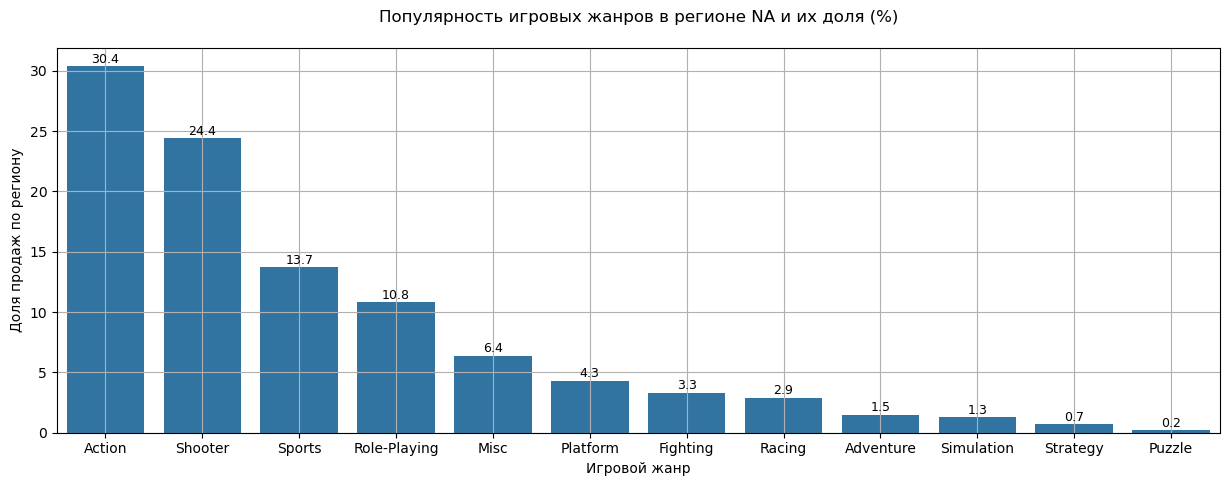

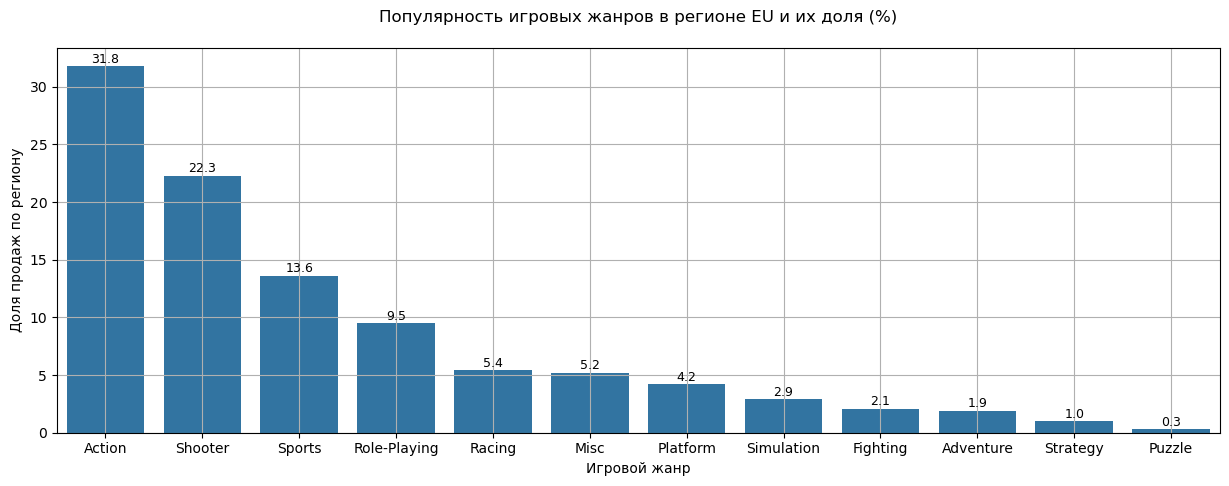

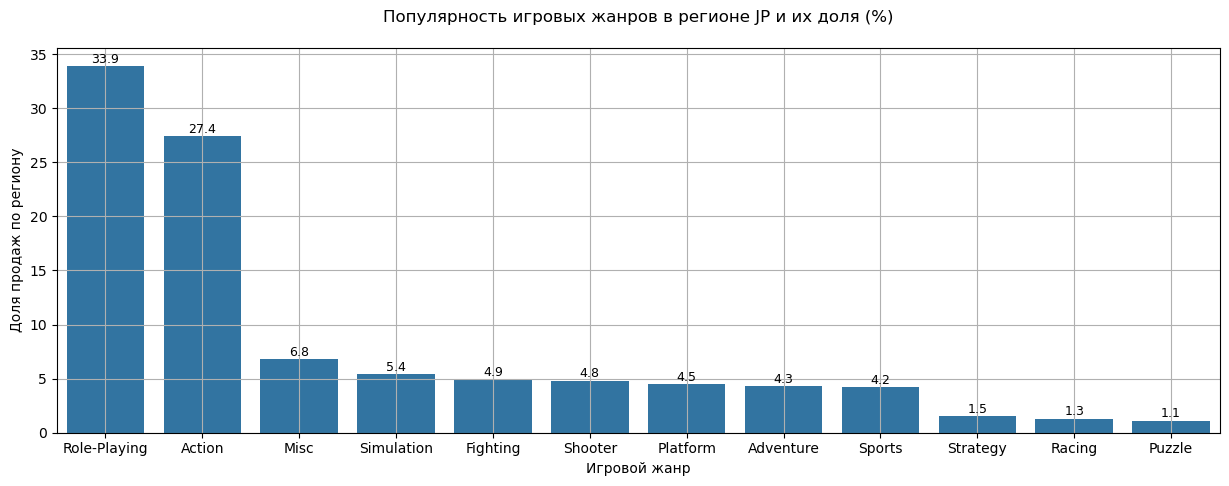

In [67]:
# Справочник районов
name_column_sales = {'na_sales': 'NA', 'eu_sales': 'EU', 'jp_sales': 'JP'}

# Создаём цикл в котором перебираем справочник "name_column_sales"
for column_sale, region in name_column_sales.items():
    df = data.query('year_of_release >= 2012').groupby(['genre'], as_index=False).aggregate({column_sale:'sum'})
    # Получаем сумму по продаж по региону
    df['total_sale'] = df[column_sale].sum()
    df['percent'] = round(df[column_sale] / df["total_sale"] * 100, 1)
        # Формируем гистограмму
    plt.figure(figsize=(15, 5))
    splot = sns.barplot(data=df.sort_values(by='percent', ascending=False), x='genre', y='percent')
    
    # Добавляем аннотацию к столбцов к диаграмме
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), # Рассчитываем местоположение стобца
                   ha = 'center', va = 'center', 
                   size=9,  # Размер текста
                   xytext = (0, 5), # Местоположение текста и его отступ от столбца
                   textcoords = 'offset points')
    
    plt.title(f'Популярность игровых жанров в регионе {region} и их доля (%)\n')
    plt.ylabel('Доля продаж по региону')
    plt.xlabel('Игровой жанр')
    plt.grid(True)
    plt.show()

Для региона `NA` самыми популярными (**TOP-5**) игровыми жанрами являются:
- `Action` с долей регионального рынка 30,4%;
- `Shooter` с долей регионального рынка 24,4%;
- `Sports` с долей регионального рынка 13,7%;
- `Role-Playing` с долей регионального рынка 10,8%;
- `Misc` с долей регионального рынка 6,4%

Вышеперечисленные платформы **занимают 84,7% регионального рынка**.

Для региона `EU` самыми популярными (**TOP-5**) игровыми жанрами являются:
- `Action` с долей регионального рынка 31,8%;
- `Shooter` с долей регионального рынка 22,3%;
- `Sports` с долей регионального рынка 13,6%;
- `Role-Playing` с долей регионального рынка 9,5%;
- `Racing` с долей регионального рынка 5,4%

Вышеперечисленные платформы **занимают 82,6% регионального рынка**.

Для региона `JP` самыми популярными (**TOP-5**) игровыми жанрами являются:
- `Role-Playing` с долей регионального рынка 33,9%;
- `Action` с долей регионального рынка 27,4%;
- `Misc` с долей регионального рынка 6,8%;
- `Simulation` с долей регионального рынка 5,4%;
- `Fighting` с долей регионального рынка 4,9%;

Вышеперечисленные платформы **занимают 78,4% регионального рынка**.

Выше было зафиксирована разная доля игровых платформ на разных региональных рынках, жанровых препочтений могут быть обусловлены регональным металитетом и региональными компаниями разработчиками игр.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

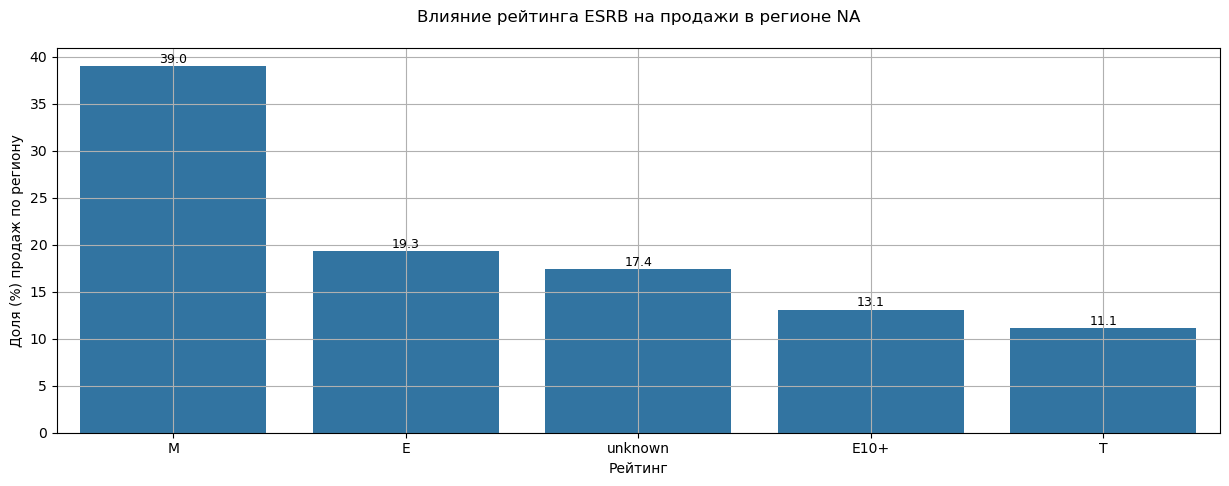

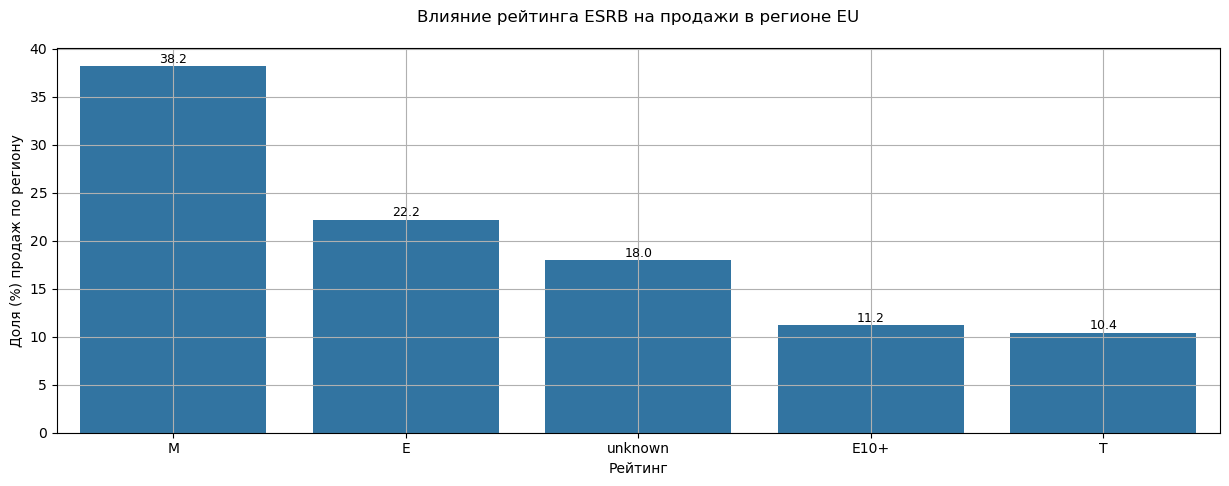

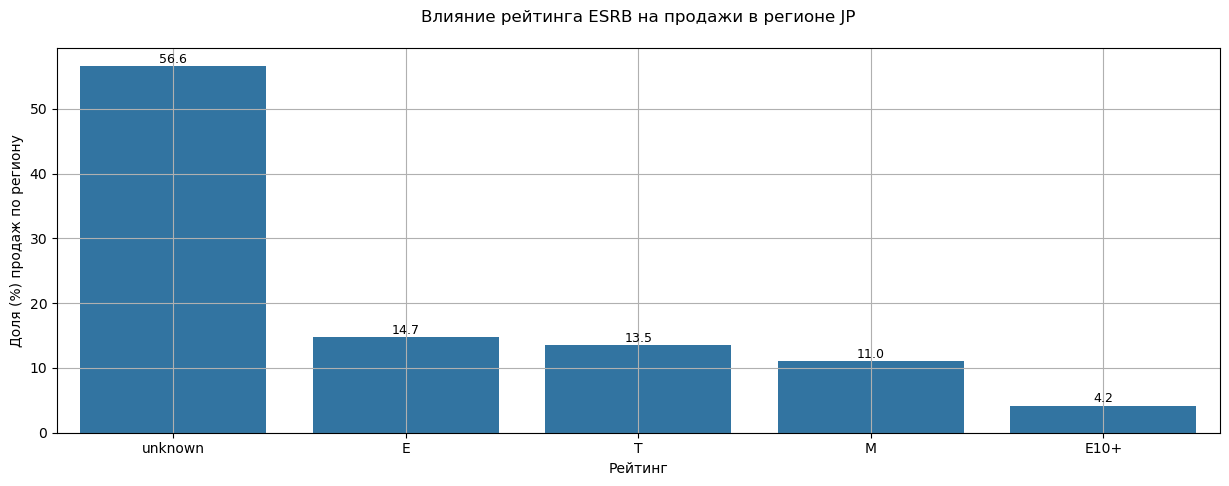

In [68]:
# Справочник районов
name_column_sales = {'na_sales': 'NA', 'eu_sales': 'EU', 'jp_sales': 'JP'}

# Создаём цикл в котором перебираем справочник "name_column_sales"
for column_sale, region in name_column_sales.items():
    df = data.query('year_of_release >= 2012').groupby(['rating'], as_index=False).aggregate({column_sale:'sum'})
    # Получаем сумму по продаж по региону
    df['total_sale'] = df[column_sale].sum()
    df['percent'] = round(df[column_sale] / df["total_sale"] * 100, 1)
        # Формируем гистограмму
    plt.figure(figsize=(15, 5))
    splot = sns.barplot(data=df.sort_values(by='percent', ascending=False), x='rating', y='percent')
    
    # Добавляем аннотацию к столбцов к диаграмме
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), # Рассчитываем местоположение стобца
                   ha = 'center', va = 'center', 
                   size=9,  # Размер текста
                   xytext = (0, 5), # Местоположение текста и его отступ от столбца
                   textcoords = 'offset points')
    
    plt.title(f'Влияние рейтинга ESRB на продажи в регионе {region}\n')
    plt.ylabel('Доля (%) продаж по региону')
    plt.xlabel('Рейтинг')
    plt.grid(True);
    plt.show()

Справочно [рейтинги ESRB](https://www.kingston.com/ru/blog/gaming/understanding-video-games-age-ratings-esrb-pegi)

- `E10+` - 	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
- `T` - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
- `M` - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.
- `E` - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
- `unknown` - Без рейтинга.

Для региона `NA` самыми популярными являются игры имеющие следующие огранияения:
- `M` - Подходит для лиц старше 17 лет.
- `E` - Подходит для всех возрастных категорий.
- `unknown` - Без рейтинга.
- `E10+` - 	Подходит для лиц старше 10 лет.
- `T` - Подходит для лиц старше 13 лет.


Для региона `EU` самыми популярными являются игры имеющие следующие огранияения:
- `M` - Подходит для лиц старше 17 лет.
- `E` - Подходит для всех возрастных категорий.
- `unknown` - Без рейтинга.
- `E10+` - 	Подходит для лиц старше 10 лет.
- `T` - Подходит для лиц старше 13 лет.


Для региона `JP` самыми популярными являются игры имеющие следующие огранияения:
- `unknown` - Без рейтинга.
- `E` - Подходит для всех возрастных категорий.
- `T` - Подходит для лиц старше 13 лет.
- `M` - Подходит для лиц старше 17 лет.
- `E10+` - 	Подходит для лиц старше 10 лет.

Максимальное количестве продаж игр без рейтинга фиксируется на региональном рынке `JP` и составляет более 56%. На региональных рынках `NA` и `EU` показатели продаж игр без рейтинга приблизительно одинаковые и находятся на уровне 17% - 18%.

Это напрямую указывает на то, что рейтингование игровых рынков `NA` и `EU` проходило в условиях отличных от рынка `JP`. 

Согласно информации из открытых источников в сети интернет [Wikipedia](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board) *"В ноябре 2012 года ESRB и другие рейтинговые советы по видеоиграм, в том числе PEGI, Австралийский классификационный совет и USK, среди прочих, создали консорциум, известный как Международная коалиция возрастных рейтингов (IARC). Группа стремилась разработать онлайн-процесс оценки цифровых видеоигр, основанный на анкетировании, который мог бы генерировать рейтинги для нескольких организаций, занимающихся оценкой видеоигр одновременно. Полученная информация о рейтингах привязывается к уникальному коду, который затем может быть использован онлайн-магазинами для отображения соответствующего рейтинга для региона пользователя. ***Три основных производителя консолей, Microsoft, Sony и Nintendo, взяли на себя обязательство поддерживать IARC для своих цифровых витрин, включая рейтинги ESRB для рынков Северной Америки.*** *Google Play Store был обновлен в марте 2015 года, чтобы <u>принять и отображать рейтинги ESRB для приложений в Северной Америке через IARC. Windows Store также внедрил IARC в январе 2016 года.</u>"*

На основании предоставленной информации, можно утверждать что рынки `NA` и `EU` развиваются по единой модели рейтингования, как наиболее тесно связанные экономические партнёры и транслируют модели рейтинговая игр, на другие региональные рынки. И этим же объясняется низкое количество продаж игр без рейтинга.

Тесными экономическими связями можно объяснить практически одинаковое распределение рейтингов и их доли на региональных рынках `NA` и `EU`.

Таким образом, можно достаточно уверенного говорить о том, что региональный рынок `JP` развивается обособленно что выражается в большом количестве 56,6% продаж игр без рейтинга. Остальные игры на этом региональном рынке, вероятнее всего были произведены компаниями котоыре работают и рейтингуются на рынках `NA` и `EU`.

## Проверьте гипотезы
Задайте самостоятельно пороговое значение alpha.

Пороговое значение `alpha` принимаем на уровне 5%, как общепринятое. 

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Формируем гипотезу.

H0 - Средние пользовательские рейтинги платформ XOne и PC равны.

H1 - Средние пользовательские рейтинги платформ XOne и PC различаются.

In [69]:
df_rating = data.query('year_of_release >= 2012 and user_score != -1')

Для выбора показателя значания `equal_var`, по-умолчанию используется значение True.
Значение False может быть установлено при выполнении `всех` нижеприведённых условий: 
- Генеральные совокупности не должны зависеть друг от друга. 
- Выборочные средние должны быть нормально распределены.
- Дисперсии рассматриваемых генеральных совокупностей должны быть равны

**Генеральная совокупность.** Т.к. рассматривается одна генеральная совокупность без изменений (до и после), **использование значения `False` считается возможным**.

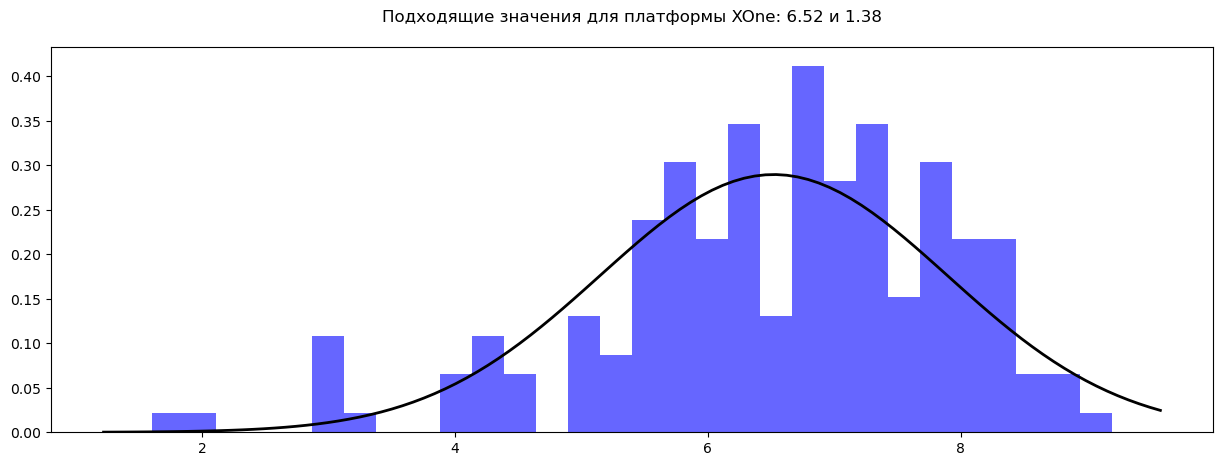

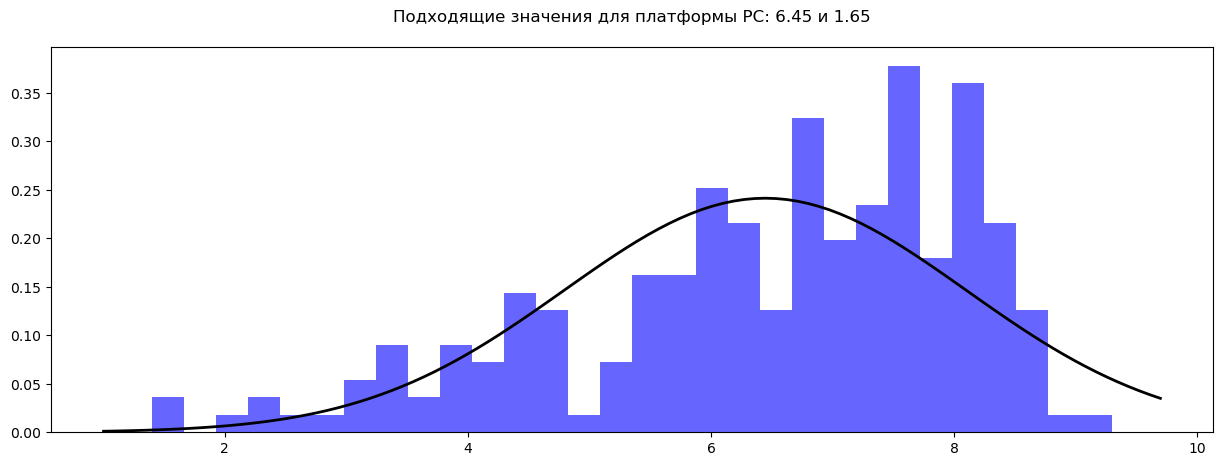

In [70]:
# Проверяем нормальное распределение выборочных совокупностей
two_platforms = ['XOne', 'PC']
for platform in two_platforms:
    df_norm = df_rating.query('platform == @platform')['user_score']

    # Подгоняем нормальное распределение к данным: среднее значение и стандартное отклонение
    # mu - максимальное значение диаграммы; 
    # std - стандартное отклонение, которое определяет величину изменения за пределами среднего

    mu, std = norm.fit(df_norm)  
    # Строим гистограмму
    plt.hist(df_norm, bins=30, density=True, alpha=0.6, color='b')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)
    title = f'Подходящие значения для платформы {platform}: {mu:.2f} и {std:.2f}\n'
    plt.title(title)

    plt.show()

Выборочное распределение выборочных совокупностей явно напоминает нормальное, но смещение в левую сторону `не позволяет` сделать утверждение, что распределение является нормальным. **Использование значение `False` не возможно**.

In [71]:
# Проводим расчёт и сравнение дисперсий генеральных совокупностей
# Преобразуем столбец 'user_score' в числовой формат, заменяя нечисловые значения на NaN
df_rating.loc[:, 'user_score'] = pd.to_numeric(df_rating['user_score'], errors='coerce')

# Теперь вычисляем дисперсию для платформы "XOne"
variance_xone = df_rating.query('platform == "XOne"')['user_score'].var()

# Теперь вычисляем дисперсию для платформы "PC"
variance_pc = df_rating.query('platform == "PC"')['user_score'].var()

if variance_xone == variance_pc:
    print('Дисперсии равны')
else:
    print(f'Дисперсии выборок не равны, использование значение False не возможно. \n\nДисперсия XOne составляет {variance_xone:.4f}, \
Дисперсия PC составляет {variance_pc:.4f}')

Дисперсии выборок не равны, использование значение False не возможно. 

Дисперсия XOne составляет 1.9070, Дисперсия PC составляет 2.7472


**Вывод: значания показателя `equal_var` будет использовать как `True`**

In [72]:
xone = df_rating.query('platform == "XOne"')['user_score']
pc = df_rating.query('platform == "PC"')['user_score']

alpha = 0.05  # задаём уровень статистической значимости

results = st.ttest_ind(xone, pc, equal_var=True)

print(f'Среднее значение XOne составляет: {pd.Series(xone).mean():.3f}')
print(f'Среднее значение PC составляет: {pd.Series(pc).mean():.3f}')

# выводим на экран полученное p-значение
print(f'\np-значение: {results.pvalue}')

if results.pvalue < alpha:  # сравниваем p-значение с заданным уровнем стат. значимости
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее значение XOne составляет: 6.521
Среднее значение PC составляет: 6.445

p-значение: 0.6252774522173157
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Средние пользовательские рейтинги платформ `XOne` и `PC` ***одинаковые***.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Формируем гипотезу.

H0 - Средние пользовательские рейтинги платформ `Action` и `Sports` равны.

H1 - Средние пользовательские рейтинги платформ `Action` и `Sports` различаются.

Для выбора показателя значания `equal_var`, по-умолчанию используется значение True.
Значение False может быть установлено при выполнении `всех` нижеприведённых условий: 
- Генеральные совокупности не должны зависеть друг от друга. 
- Выборочные средние должны быть нормально распределены.
- Дисперсии рассматриваемых генеральных совокупностей должны быть равны

**Генеральная совокупность.** Т.к. рассматривается одна генеральная совокупность без изменений (до и после), **использование значения `False` считается возможным**.

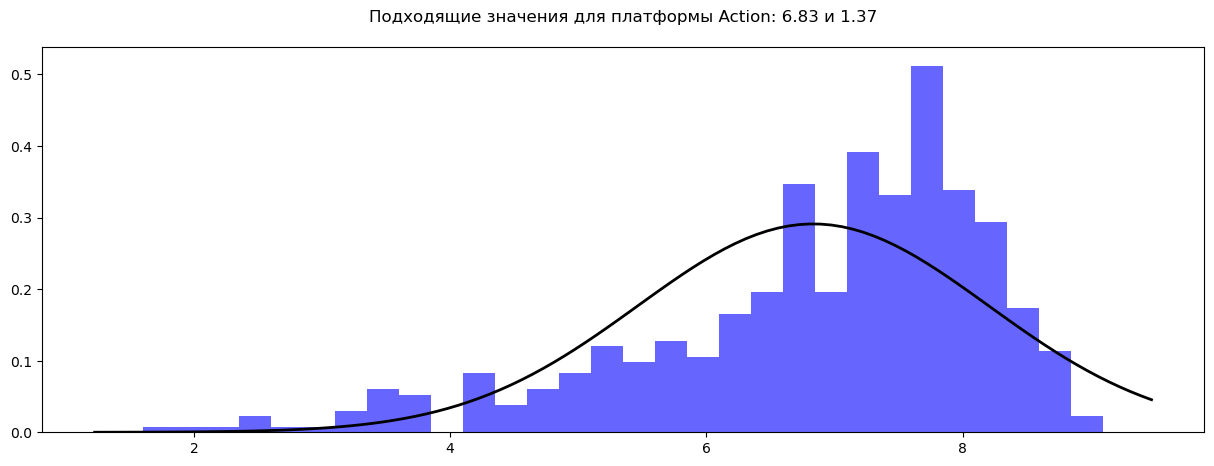

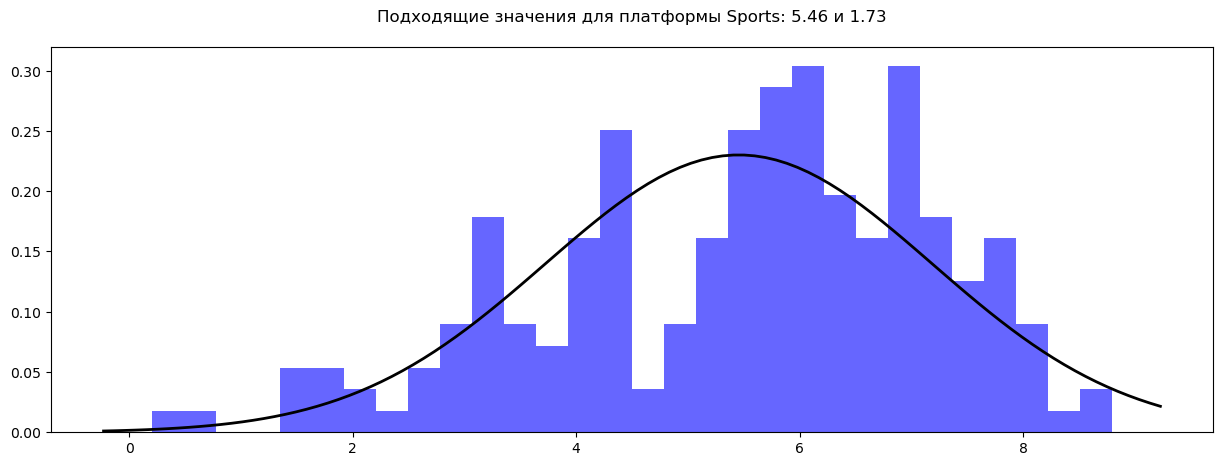

In [73]:
# Проверяем нормальное распределение выборочных совокупностей
two_genres = ['Action', 'Sports']
for genre in two_genres:
    df_norm = df_rating.query('genre == @genre')['user_score']

    # Подгоняем нормальное распределение к данным: среднее значение и стандартное отклонение
    # mu - максимальное значение диаграммы; 
    # std - стандартное отклонение, которое определяет величину изменения за пределами среднего

    mu, std = norm.fit(df_norm)  
    # Строим гистограмму
    plt.hist(df_norm, bins=30, density=True, alpha=0.6, color='b')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)
    title = f'Подходящие значения для платформы {genre}: {mu:.2f} и {std:.2f}\n'
    plt.title(title)

    plt.show()

Выборочное распределение выборочных совокупностей явно напоминает нормальное, но смещение в левую сторону `не позволяет` сделать утверждение, что распределение является нормальным. **Использование значение `False` не возможно**.

In [74]:
action = df_rating.query('genre == "Action"')['user_score']
sports = df_rating.query('genre == "Sports"')['user_score']

alpha = 0.05  # задаём уровень статистической значимости

result = st.ttest_ind(action, sports, equal_var=True)

print(f'Среднее значение Action составляет: {pd.Series(action).mean():.3f}')
print(f'Среднее значение Sports составляет: {pd.Series(sports).mean():.3f}')

# выводим на экран полученное p-значение
print(f'\np-значение: {result.pvalue}')

if results.pvalue < alpha:  # сравниваем p-значение с заданным уровнем стат. значимости
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее значение Action составляет: 6.834
Среднее значение Sports составляет: 5.456

p-значение: 1.1405639632267916e-26
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Средние пользовательские рейтинги жанров `Action` и `Sports` - ***разные***

### Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

**Формирование гипотез.**

При формировании гипотез должно соблюдаться общее правило: "*H₀ всегда формулируется так, чтобы использовался знак равенства. Исходя из H₀ формулируется альтернативная гипотеза H1. Это утверждение, которое принимается верным, если отбрасывается H₀.*"

**Проверка гипотез.**

Если полученные данные гипотезе не противоречат, тогда мы её не отвергаете. Если же результаты экперимента показывают, что вероятность получить результаты гипотезы H0 очень низка, появляется основание отбросить эту гипотезу. Проверка гипотез статистическим тестом как раз в том, чтобы эту вероятность найти.

В нашем случае для проверки гипотезы использовался Параметрические критерии – t-тест - критерии значимости, который служит для проверки гипотез о параметрах распределений (чаще всего нормального). В рамках его использования были проведены исследования `зависисмости генеральной совокупности друг от друга`, `нормальное распределение средних` и на `равенство дисперсий рассматриваемых генеральных совокупностей`.

## Напишите общий вывод

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

На представленном ниже графике показана общая информация выпуска игр. Отчётливо наблюдается, что до 1990 года, количество выпускаемых игр было примерно одинаково, не считая роста 1981 года. 

Начиная с 1991 года происходит рост выпуска игр вплоть до 2008 года. В 2008 году было выпущено 1441 новая игра, что является максимальным количеством за анализируемый период. 

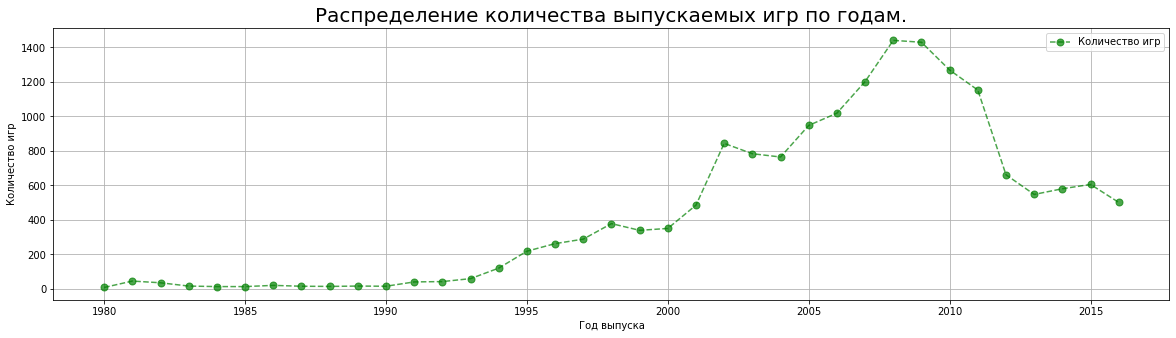

После 2009 года происходит резкое сокращение выпуска новых игр. В результате анализа сети интернет, можно с уверенностью говорить о том, что 2008 год был насыщен на знаковые собития ([10 памятных событий](https://snob.ru/selected/entry/1366/), [РиаНовости](https://ria.ru/20081226/158117155.html)) основным собитие которое могло повлиять на различные отрасли по всему миру является начало мирового финансового кризиса, который начался в 2008 году, а своего пика достиг в 2009, что объясняет резкое снижение выпуска игр.

На основании представленного выше графика, становиться очевидным, что до 2012 года прозошло максимальное снижение количества выпуска игр. После 2012 года снижение продолжилось но уже меньшей интенсивностью, а после 2013 года произошёл рост выпуска игр.

Таким образом наиболее актуальным переиодом для прогнозирования на 2017 год, являются данные после 2012 года, их будем использовать для дальнейшего анализа.

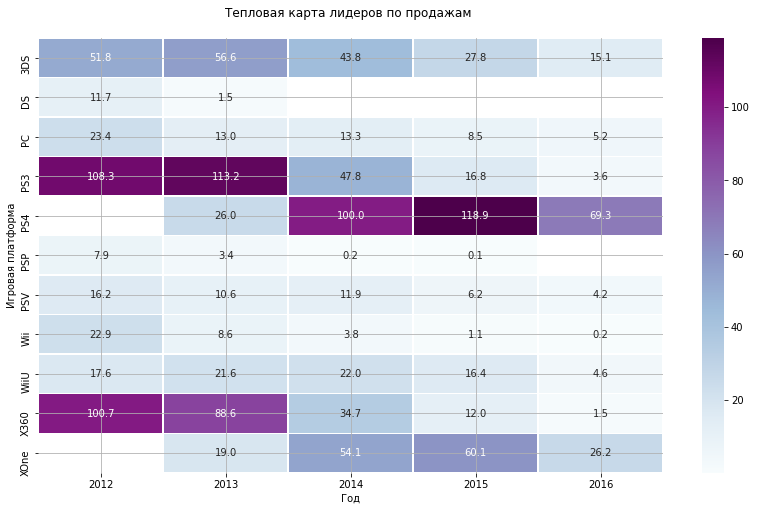

На выше представленном графике, **показывается рост** по продажам следующие игровые платформы `PS4` и `XOne`.

**Остальные игровые платформы показывают снижение продаж**. Стоит отметить что игровые платформы `DS`, `PSP` уже **прекратили выпуск игр**, а Wii на грани прекращения выпуска игр. Таким образом, инвестиции в разработки игр на этих игровых платформах **не рекомендуются**. 

Для дальнейшего исследования отберём потенциально прибыльные платформы, которые на протяжении анализируемого периода показывали продажи выше среднего, это `3DS`, `PS3`, `PS4`, `X360` и `XOne`

На графике "Глобальных продаж" наибольшим образом выделяются 4-ре игровые платформы `X360`, `PS4`, `XOne` и `PS3`, продажи игр по которым имеют максимальные значения.

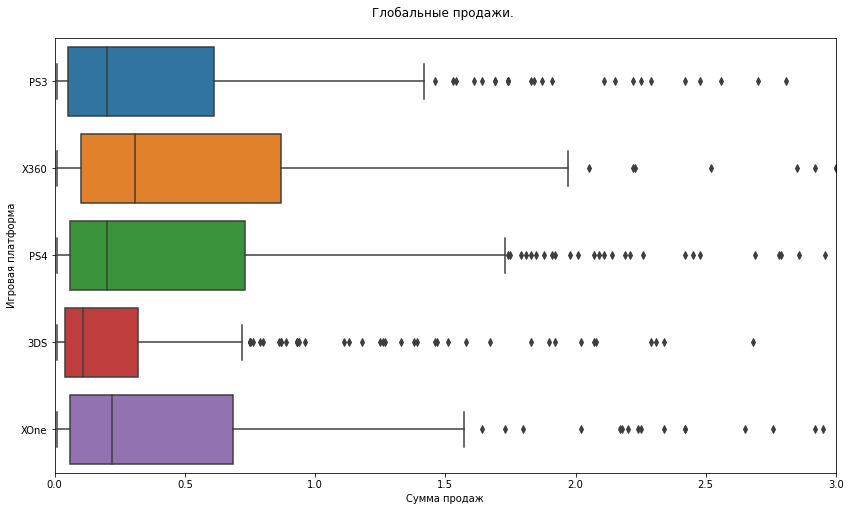

Медианное значение у игровой платформы `X360` находиться выше оставльных, а граница Q1 и Q3 имеют больший диапазон, что означает что количество продаж, которые приходятся на межквартильный интервал выше чем у остальных платформ, соответственно и выручка от продаж будет больше.

На следующей таблице представлные данные о влиянии `отзывов критиков` на продажи. Такое поведение говорит о том, что не смотря на положительную направленность корреляции и наличии незначительной взаимосвязи, такая взаимосвязь **имеется по всем игровым платформам** и это влияние необходимо учитывать при принятии решений по инвестированию.


|Платформа | Корреляция по Оценке пользователя | Корреляция по Оценка критика|
|----------|-----------------------------------|-----------------------------|
|3DS | 0.2028 |	0.3103 |
|PS3 | 0.0031 | 0.3309 |
|PS4 | -0.0336 | 0.4059 |
|X360 |	-0.0023 | 0.3603 |
|XOne |	-0.0940 | 0.4104 |

Влияние `отзывов пользователей` на продажи, в основной своей массе отсутствует, при этом отдельно выделяется игровая платформа `3DS`, показатель корреляции которой составляет 0,2028, что показывает наличие незначительного влияния на продажи.

При анализе зависимости продажи игр от их жанра (график ниже) выявлено наибольшее число продаж у игр жанра `Shooter` и он является самым популярным игровым жанром. Меньше всего продаж у игр в жанре `Adventure`.
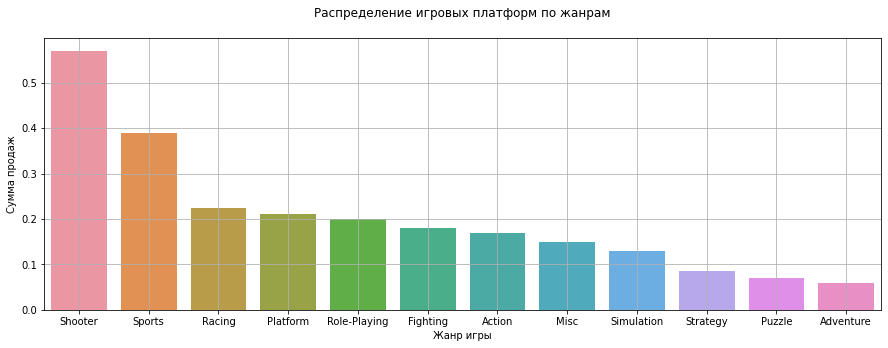

Если сравнить по количеству продаж, то с большим отрывом от остальных жанров лидерами продаж на мировом рынке, являются игры в жанрах `Shooter` и `Sports`. В первую 5-ку лидеров продаж составляют такие жанры как `Shooter`, `Sports`, `Racing`, `Platform` и `Role-Playing`.

**Распределение продаж игр от их жанра на региональных рынках представлено ниже:**
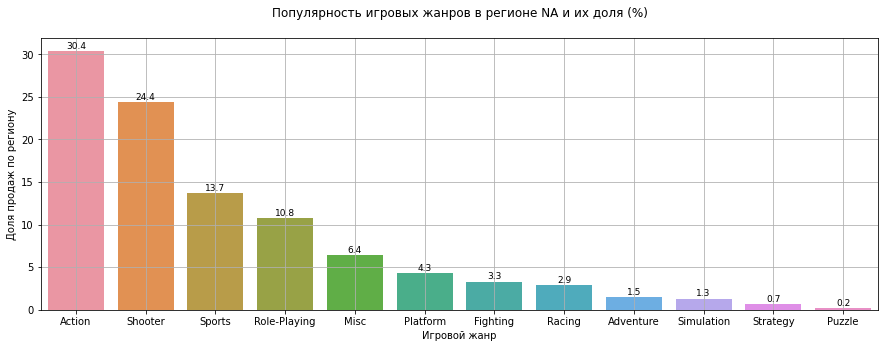
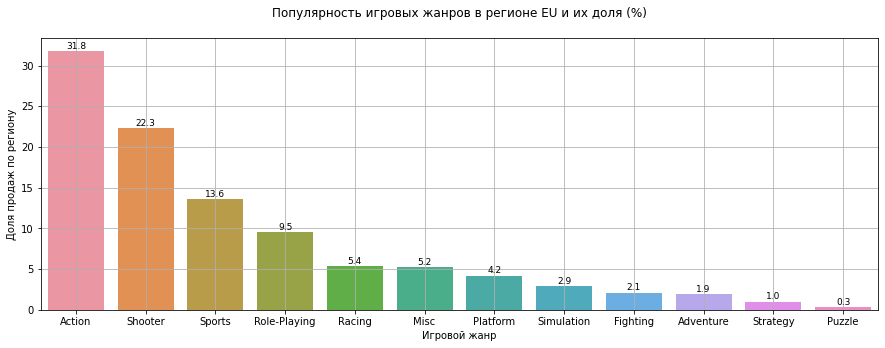
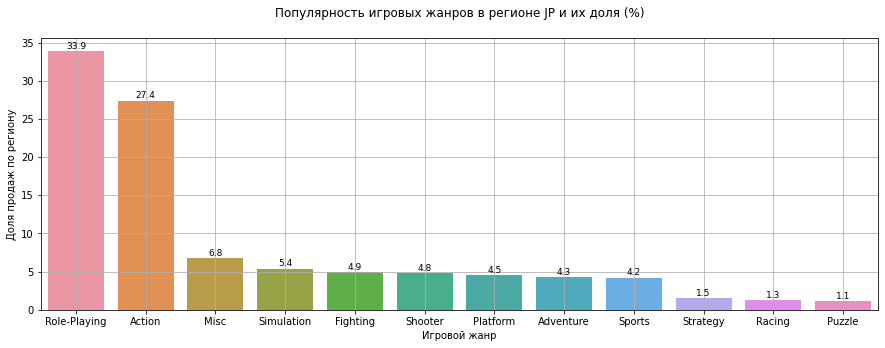

Для региона `NA` самыми популярными (**TOP-5**) игровыми жанрами являются:
- `Action` с долей регионального рынка 30,4%;
- `Shooter` с долей регионального рынка 24,4%;
- `Sports` с долей регионального рынка 13,7%;
- `Role-Playing` с долей регионального рынка 10,8%;
- `Misc` с долей регионального рынка 6,4%

Вышеперечисленные платформы **занимают 84,7% регионального рынка**.

Для региона `EU` самыми популярными (**TOP-5**) игровыми жанрами являются:
- `Action` с долей регионального рынка 31,8%;
- `Shooter` с долей регионального рынка 22,3%;
- `Sports` с долей регионального рынка 13,6%;
- `Role-Playing` с долей регионального рынка 9,5%;
- `Racing` с долей регионального рынка 5,4%

Вышеперечисленные платформы **занимают 82,6% регионального рынка**.

Для региона `JP` самыми популярными (**TOP-5**) игровыми жанрами являются:
- `Role-Playing` с долей регионального рынка 33,9%;
- `Action` с долей регионального рынка 27,4%;
- `Misc` с долей регионального рынка 6,8%;
- `Simulation` с долей регионального рынка 5,4%;
- `Fighting` с долей регионального рынка 4,9%;

Вышеперечисленные платформы **занимают 78,4% регионального рынка**.

**Проанализируем влияние на продажи, наличие рейтинга у игр в разрезе региональных рынков.**

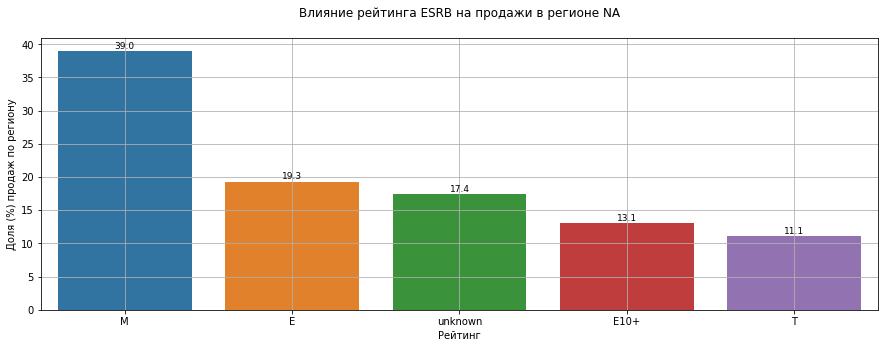
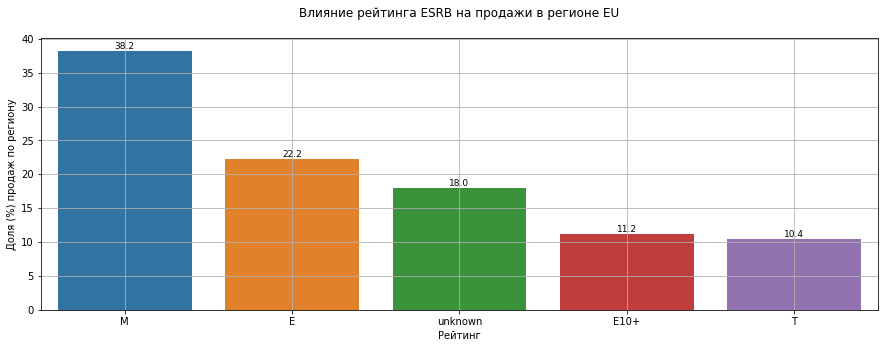
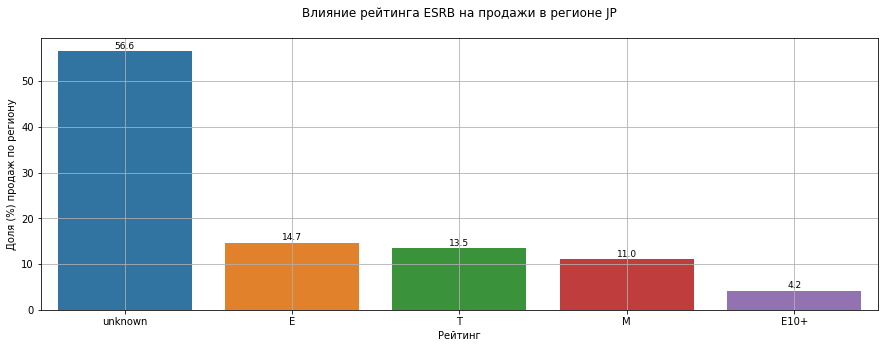

Для региона `NA` самыми популярными являются игры имеющие следующие огранияения:
- `M` - Подходит для лиц старше 17 лет.
- `E` - Подходит для всех возрастных категорий.
- `unknown` - Без рейтинга.
- `E10+` - 	Подходит для лиц старше 10 лет.
- `T` - Подходит для лиц старше 13 лет.


Для региона `EU` самыми популярными являются игры имеющие следующие огранияения:
- `M` - Подходит для лиц старше 17 лет.
- `E` - Подходит для всех возрастных категорий.
- `unknown` - Без рейтинга.
- `E10+` - 	Подходит для лиц старше 10 лет.
- `T` - Подходит для лиц старше 13 лет.


Для региона `JP` самыми популярными являются игры имеющие следующие огранияения:
- `unknown` - Без рейтинга.
- `E` - Подходит для всех возрастных категорий.
- `T` - Подходит для лиц старше 13 лет.
- `M` - Подходит для лиц старше 17 лет.
- `E10+` - 	Подходит для лиц старше 10 лет.

Максимальное количестве продаж игр без рейтинга фиксируется на региональном рынке `JP` и составляет более 56%. На региональных рынках `NA` и `EU` показатели продаж игр без рейтинга приблизительно одинаковые и находятся на уровне 17% - 18%.

Это напрямую указывает на то, что рейтингование игровых рынков `NA` и `EU` проходило в условиях отличных от рынка `JP`. 

Согласно информации из открытых источников в сети интернет [Wikipedia](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board) *"В ноябре 2012 года ESRB и другие рейтинговые советы по видеоиграм, в том числе PEGI, Австралийский классификационный совет и USK, среди прочих, создали консорциум, известный как Международная коалиция возрастных рейтингов (IARC). Группа стремилась разработать онлайн-процесс оценки цифровых видеоигр, основанный на анкетировании, который мог бы генерировать рейтинги для нескольких организаций, занимающихся оценкой видеоигр одновременно. Полученная информация о рейтингах привязывается к уникальному коду, который затем может быть использован онлайн-магазинами для отображения соответствующего рейтинга для региона пользователя. ***Три основных производителя консолей, Microsoft, Sony и Nintendo, взяли на себя обязательство поддерживать IARC для своих цифровых витрин, включая рейтинги ESRB для рынков Северной Америки.*** *Google Play Store был обновлен в марте 2015 года, чтобы <u>принять и отображать рейтинги ESRB для приложений в Северной Америке через IARC. Windows Store также внедрил IARC в январе 2016 года.</u>"*

На основании предоставленной информации, можно утверждать что рынки `NA` и `EU` развиваются по единой модели рейтингования, как наиболее тесно связанные экономические партнёры и транслируют модели рейтинговая игр, на другие региональные рынки. И этим же объясняется низкое количество продаж игр без рейтинга.

Тесными экономическими связями можно объяснить практически одинаковое распределение рейтингов и их доли на региональных рынках `NA` и `EU`.

Таким образом, можно достаточно уверенного говорить о том, что региональный рынок `JP` развивается обособленно что выражается в большом количестве 56,6% продаж игр без рейтинга. Остальные игры на этом региональном рынке, вероятнее всего были произведены компаниями которые работают и рейтингуются на рынках `NA` и `EU`.

Из вышеприведённой информации, можно говорить что рынок `JP` за счёт дальнейшего распространения систем рейтингования `NA` и `EU` может в значительной степени изменить соотношение продаж игр по игровой аудитории за счёт исключения из тройки лидеров игр с рейтингом `T` - (Подходит для лиц старше 13 лет). Игры данной категории исключены из рекомендуемых в результатах этого анализа.

**Для регионального рынка `NA` наиболее предпочтительно сосредоточиться на:**

***Игровые платформы***
- `X360` с долей регионального рынка 23,7%;
- `PS4` с долей регионального рынка 18,3%;
- `PS3` с долей регионального рынка 17,5%;

***Жанры игр***
- `Action` с долей регионального рынка 30,4%;
- `Shooter` с долей регионального рынка 24,4%;
- `Sports` с долей регионального рынка 13,7%;

***Рейтинг игр***
- `M` - Подходит для лиц старше 17 лет.
- `E` - Подходит для всех возрастных категорий.


**Для регионального рынка `EU` наиболее предпочтительно сосредоточиться на:**

***Игровые платформы***
- `PS4` с долей регионального рынка 27,7%;
- `PS3` с долей регионального рынка 21,1%;
- `X360` с долей регионального рынка 14,7%;

***Жанры игр***
- `Action` с долей регионального рынка 31,8%;
- `Shooter` с долей регионального рынка 22,3%;
- `Sports` с долей регионального рынка 13,6%;

***Рейтинг игр***
- `M` - Подходит для лиц старше 17 лет.
- `E` - Подходит для всех возрастных категорий.

**Для регионального рынка `JP` наиболее предпочтительно сосредоточиться на:**

***Игровые платформы***
- `3DS` с долей регионального рынка 45,5%;
- `PS3` с долей регионального рынка 18,3%;
- `PSV` с долей регионального рынка 10,9%;

***Жанры игр***
- `Role-Playing` с долей регионального рынка 33,9%;
- `Action` с долей регионального рынка 27,4%;

***Рейтинг игр***
- `E` - Подходит для всех возрастных категорий.
- `M` - Подходит для лиц старше 17 лет.